Housekeeping

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.optimize import fsolve

from f_detrend import detrend_fuction

sn.set_style('whitegrid')
%matplotlib inline

In [2]:
# Expanded and modified version (first column now string)
def read_table(filename,keyword='ciclo',rescale=1,ncols=5,start=2,endword=None,index_to_int=True,debug=False):
    t0 = start
    t1 = ncols+start
    results_follow = 0
    row_names = []
    f = open(filename,'r')
    for line in f:
        words = line.split()
        if debug:
            print(words)
        if len(words)>1 and words[0] == keyword:
            results_follow=1
            if endword==None:
                colnames = words[t0:t1]
            else:
                buff_v = []
                for w in words[t0:]:
                    if w==endword:
                        break
                    else:
                        buff_v.append(w)
                colnames = buff_v[:-1]
                t1 = len(buff_v)+t0-1
            table_raw = np.empty(t1-t0)
        elif len(words)>1 and words[0] == "Total":
            break
        elif len(words)>1 and results_follow==1:
            row_names.append(words[0])
            buff_v = []
            for w in words[t0:t1]: 
                w = w.replace(",","")
                buff_v.append(w)
            table_raw = np.vstack((table_raw,np.array(buff_v,dtype=float)/rescale))
    table_raw = table_raw[1:,:]
    if debug:
        print(table_raw.shape)
        print(colnames)
    if index_to_int:
        return pd.DataFrame(table_raw, columns=colnames,index=np.array(row_names,dtype=int))
    else:
        return pd.DataFrame(table_raw, columns=colnames,index=np.array(row_names))

In [3]:
def normalise_table(table):
    cols = table.columns
    table['Total'] = table.sum(axis=1).copy()
    for col in cols:
        table[col] = table[col]/table['Total']
    return table   

In [4]:
dates = []
for year in range(1987,2022):
    for quarter in range(1,5):
        dates.append(str(year)+"Q"+str(quarter))
dates = dates[1:]

t0 = 59
t05 = 71
T = len(dates)
date_dict = dict(zip(range(t0,T+t0),dates))
date_dict_reverse = dict(zip(dates,range(0,T)))
date_dict_reverse_ciclo = dict(zip(dates,range(t0,T+t0)))

<a id='index'></a>


## Tenure assortativity for couples

Jump to
 - [Tenure Heatmaps](#heatwave)
 - [Employment plots](#emp)
 - [Age plots](#age)
 - [Hours plots](#hours)
  
 --------------

In [5]:
path = './rawtabs_dem/'

ratio_tab = read_table(path+'tenure_ratio.log',keyword='ciclo',rescale=1,ncols=5)
ratio_tab_p = read_table(path+'tenure_ratio_P.log',keyword='ciclo',rescale=1,ncols=5)
ratio_tab_w = read_table(path+'tenure_ratio_w.log',keyword='ciclo',rescale=1,ncols=5)
ratio_tab_w_p = read_table(path+'tenure_ratio_P_w.log',keyword='ciclo',rescale=1,ncols=5)

ten_mo = read_table(path+'tenure_mothers.log',keyword='ciclo',rescale=1,ncols=7)
ten_fa = read_table(path+'tenure_fathers.log',keyword='ciclo',rescale=1,ncols=7)
ten_mo_p = read_table(path+'tenure_mothers_p.log',keyword='ciclo',rescale=1,ncols=7)
ten_fa_p = read_table(path+'tenure_fathers_p.log',keyword='ciclo',rescale=1,ncols=7)

ten_w_mo = read_table(path+'tenure_mothers_w.log',keyword='ciclo',rescale=1,ncols=7)
ten_w_fa = read_table(path+'tenure_fathers_w.log',keyword='ciclo',rescale=1,ncols=7)
ten_w_mo_p = read_table(path+'tenure_mothers_p_w.log',keyword='ciclo',rescale=1,ncols=7)
ten_w_fa_p = read_table(path+'tenure_fathers_p_w.log',keyword='ciclo',rescale=1,ncols=7)

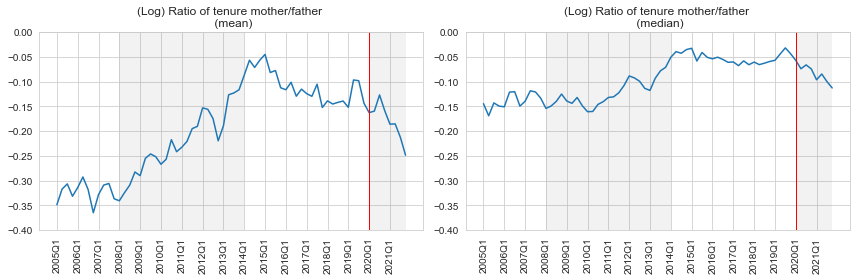

In [6]:
t00 = 59
t0 = int(ratio_tab['Mean'].index[0])-t00

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('(Log) Ratio of tenure mother/father \n (mean)')
plt.plot(dates[t0:],ratio_tab_w['Mean'])
plt.axvline('2020Q1',c='r',lw=1)
plt.ylim(-.4,0)
plt.xticks(dates[t0::4],rotation=90)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.subplot(122)
plt.title('(Log) Ratio of tenure mother/father \n (median)')
plt.plot(dates[t0:],ratio_tab_w['p50'])
plt.axvline('2020Q1',c='r',lw=1)
plt.xticks(dates[t0::4],rotation=90)
plt.ylim(-.4,0)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()

plt.savefig('./plots_tenure/ratio_ten_timeline_w.pdf',format='pdf',bbox_inches='tight')
plt.show()

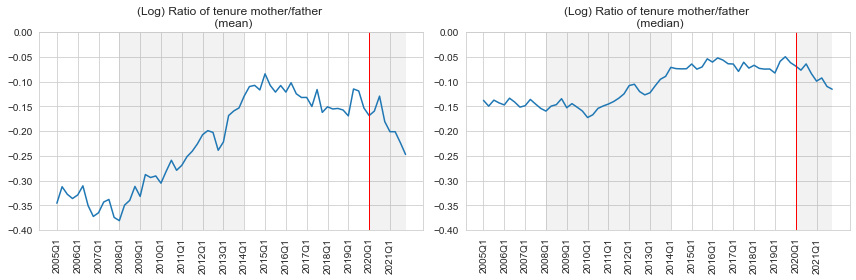

In [420]:
t00 = 59
t0 = int(ratio_tab['Mean'].index[0])-t00

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('(Log) Ratio of tenure mother/father \n (mean)')
plt.plot(dates[t0:],ratio_tab['Mean'])
plt.axvline('2020Q1',c='r',lw=1)
plt.ylim(-.4,0)
plt.xticks(dates[t0::4],rotation=90)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.subplot(122)
plt.title('(Log) Ratio of tenure mother/father \n (median)')
plt.plot(dates[t0:],ratio_tab['p50'])
plt.axvline('2020Q1',c='r',lw=1)
plt.xticks(dates[t0::4],rotation=90)
plt.ylim(-.4,0)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()

plt.savefig('./plots_tenure/ratio_ten_timeline.pdf',format='pdf',bbox_inches='tight')
plt.show()

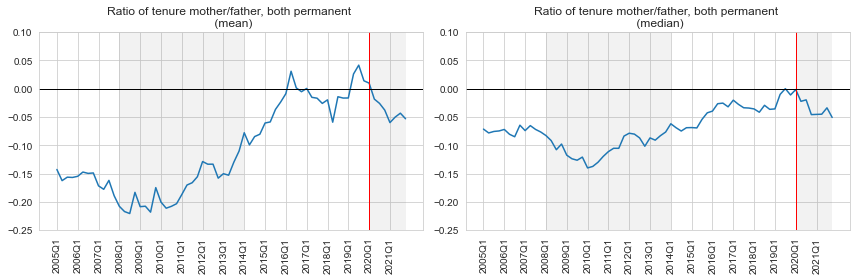

In [428]:
t00 = 59
t0 = int(ratio_tab_p['Mean'].index[0])-t00

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Ratio of tenure mother/father, both permanent \n (mean)')
plt.plot(dates[t0:],ratio_tab_p['Mean'])
plt.axvline('2020Q1',c='r',lw=1)
plt.ylim(-0.25,0.1)
plt.xticks(dates[t0::4],rotation=90)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)
plt.axhline(c='k',lw=1)

plt.subplot(122)
plt.title('Ratio of tenure mother/father, both permanent \n (median)')
plt.plot(dates[t0:],ratio_tab_p['p50'])
plt.axvline('2020Q1',c='r',lw=1)
plt.xticks(dates[t0::4],rotation=90)
plt.ylim(-0.25,0.1)
plt.axhline(c='k',lw=1)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/ratio_ten_timeline_p.pdf',format='pdf',bbox_inches='tight')
plt.show()

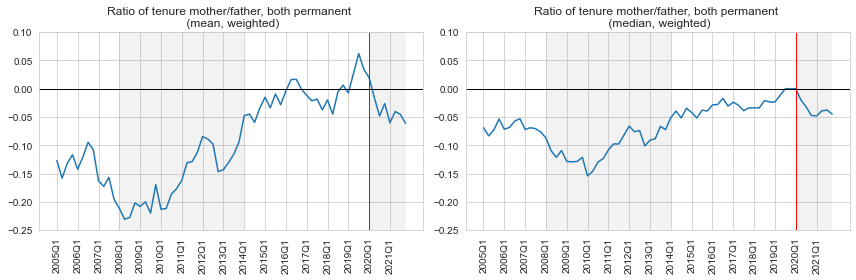

In [427]:
t00 = 59
t0 = int(ratio_tab_p['Mean'].index[0])-t00

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Ratio of tenure mother/father, both permanent \n (mean, weighted)')
plt.plot(dates[t0:],ratio_tab_w_p['Mean'])
plt.axvline('2020Q1',c='r',lw=1)
plt.ylim(-0.25,0.1)
plt.axhline(c='k',lw=1)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)
plt.xticks(dates[t0::4],rotation=90)

plt.subplot(122)
plt.title('Ratio of tenure mother/father, both permanent \n (median, weighted)')
plt.plot(dates[t0:],ratio_tab_w_p['p50'])
plt.axvline('2020Q1',c='r',lw=1)
plt.xticks(dates[t0::4],rotation=90)
plt.ylim(-0.25,0.1)
plt.axhline(c='k',lw=1)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/ratio_ten_timeline_p_w.pdf',format='pdf',bbox_inches='tight')
plt.show()

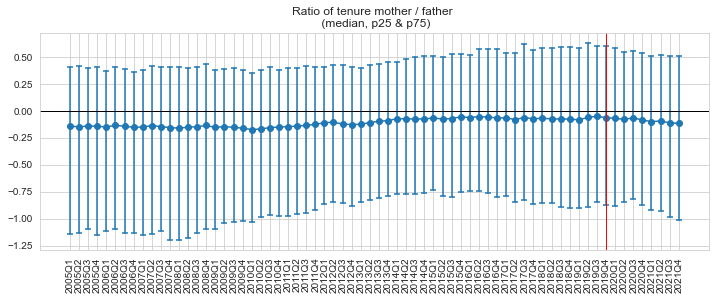

In [437]:
t00 = 59
t0 = int(ratio_tab['p50'].index[0])-t00
colors = sn.color_palette()

plt.figure(figsize=(12,4))
plt.title('Ratio of tenure mother / father \n (median, p25 & p75)')
plt.plot(dates[t0:],ratio_tab['p50'],marker='o')
plt.scatter(dates[t0:],ratio_tab['p25'],marker='_',color=colors[0])
plt.scatter(dates[t0:],ratio_tab['p75'],marker='_',color=colors[0])

# plt.scatter(dates[t0:],ratio_tab['p10'],marker='.',color=colors[0])
# plt.scatter(dates[t0:],ratio_tab['p90'],marker='.',color=colors[0])
for i in range(ratio_tab['p25'].size):
    plt.plot([dates[t0:][i],dates[t0:][i]],[ratio_tab['p25'].iloc[i],ratio_tab['p75'].iloc[i]],c=colors[0])
# plt.fill_between(dates[t0:],ratio_tab['Mean']-ratio_tab['SD'], 
#             ratio_tab['Mean']+ratio_tab['SD'], color='b', alpha=0.1, lw=0)
plt.axvline('2019Q4',c='r',lw=1)
plt.axhline(c='k',lw=1)
plt.xticks(rotation=90)
# plt.ylim(0,2)
plt.show()

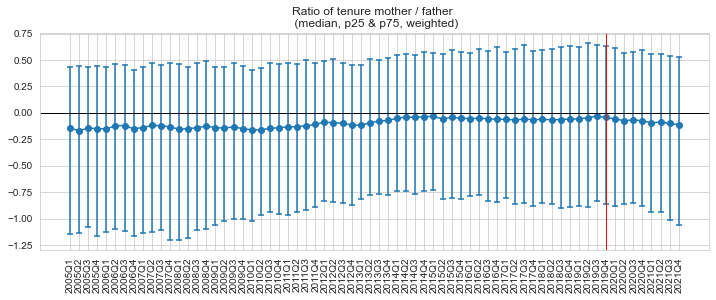

In [438]:
t00 = 59
t0 = int(ratio_tab_w['p50'].index[0])-t00
colors = sn.color_palette()

plt.figure(figsize=(12,4))
plt.title('Ratio of tenure mother / father \n (median, p25 & p75, weighted)')
plt.plot(dates[t0:],ratio_tab_w['p50'],marker='o')
plt.scatter(dates[t0:],ratio_tab_w['p25'],marker='_',color=colors[0])
plt.scatter(dates[t0:],ratio_tab_w['p75'],marker='_',color=colors[0])
for i in range(ratio_tab_w['p25'].size):
    plt.plot([dates[t0:][i],dates[t0:][i]],[ratio_tab_w['p25'].iloc[i],ratio_tab_w['p75'].iloc[i]],c=colors[0])
# plt.fill_between(dates[t0:],ratio_tab_w['Mean']-ratio_tab_w['SD'], 
#             ratio_tab_w['Mean']+ratio_tab_w['SD'], color='b', alpha=0.1, lw=0)
plt.axvline('2019Q4',c='r',lw=1)
plt.axhline(0,c='k',lw=1)
plt.xticks(rotation=90)
# plt.ylim(0,2)
plt.show()

### Raw tenure

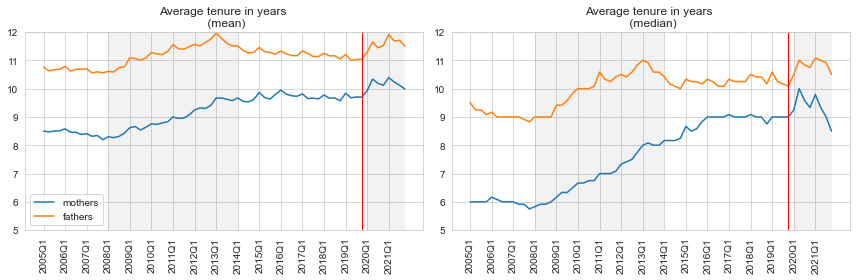

In [43]:
t00 = 59
t0 = int(ten_mo['Mean'].index[0])-t00

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Average tenure in years \n (mean)')
plt.plot(dates[t0:],ten_mo['Mean']/12,label='mothers')
plt.plot(dates[t0:],ten_fa['Mean']/12,label='fathers')
plt.axvline('2019Q4',c='r',lw=1)
plt.ylim(5,12.0)
plt.legend()
plt.xticks(dates[t0::4],rotation=90)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.subplot(122)
plt.title('Average tenure in years \n (median)')
plt.plot(dates[t0:],ten_mo['p50']/12,label='mothers')
plt.plot(dates[t0:],ten_fa['p50']/12,label='fathers')
plt.axvline('2019Q4',c='r',lw=1)
plt.xticks(dates[t0::4],rotation=90)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)
plt.ylim(5,12.0)
plt.tight_layout()
plt.savefig('./plots_tenure/ten_timeline.pdf',format='pdf',bbox_inches='tight')
plt.show()

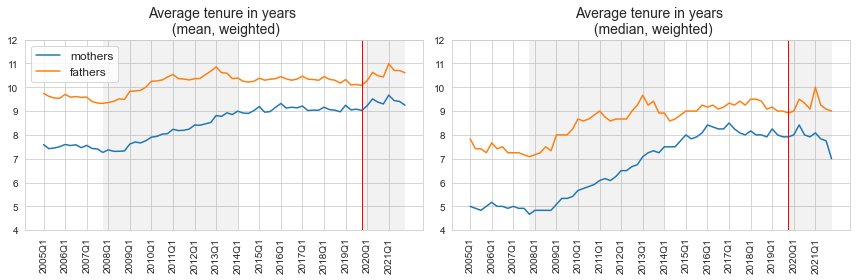

In [44]:
t00 = 59
t0 = int(ten_w_mo['Mean'].index[0])-t00

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Average tenure in years \n (mean, weighted)',fontsize=14)
plt.plot(dates[t0:],ten_w_mo['Mean']/12,label='mothers')
plt.plot(dates[t0:],ten_w_fa['Mean']/12,label='fathers')
plt.axvline('2019Q4',c='r',lw=1)
plt.ylim(4,12)
plt.legend(fontsize=12)
plt.xticks(dates[t0::4],rotation=90)
plt.axvspan('2007Q4', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2019Q4', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.subplot(122)
plt.title('Average tenure in years \n (median, weighted)',fontsize=14)
plt.plot(dates[t0:],ten_w_mo['p50']/12,label='mothers')
plt.plot(dates[t0:],ten_w_fa['p50']/12,label='fathers')
plt.axvline('2019Q4',c='r',lw=1)
plt.xticks(dates[t0::4],rotation=90)
plt.axvspan('2007Q4', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2019Q4', '2021Q4', color='grey', alpha=0.1, lw=0)
# plt.yticks(np.arange(7,12.5,0.5))
plt.ylim(4,12)
plt.tight_layout()
plt.savefig('./plots_tenure/ten_timeline_w.pdf',format='pdf',bbox_inches='tight')
plt.show()

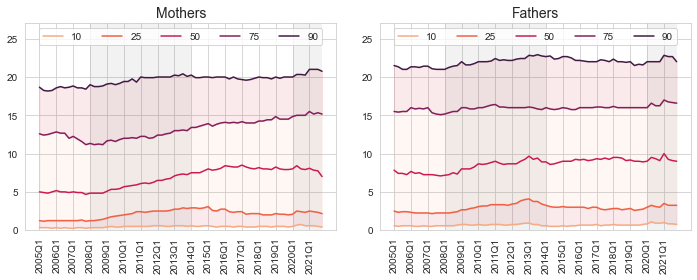

In [463]:
colors = sn.color_palette('rocket_r',5)
pctiles = ['p10','p25','p50','p75','p90']
ten_data = [ten_w_mo,ten_w_fa]
titles = ['Mothers','Fathers']

plt.figure(figsize=(10,4))
for j,data in enumerate(ten_data):
    plt.subplot(121+j)
    plt.title(titles[j],fontsize=14)
    for i,pc in enumerate(pctiles):
        plt.plot(dates[t0:],data[pc]/12,label=pc[1:],c=colors[i])

    plt.legend(ncol=5,loc='upper center')
    plt.xticks(dates[t0::4],rotation=90)
    plt.ylim(0,27)

    plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
    plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)
    
    plt.fill_between(dates[t0:],data['p25']/12,data['p75']/12,color=reds[0],alpha=0.1)
    plt.fill_between(dates[t0:],data['p10']/12,data['p25']/12,color=reds[2],alpha=0.1)
    plt.fill_between(dates[t0:],data['p75']/12,data['p90']/12,color=reds[2],alpha=0.1)

plt.tight_layout()
plt.savefig('./plots_tenure/ten_dist_w.pdf',format='pdf',bbox_inches='tight')
plt.show()

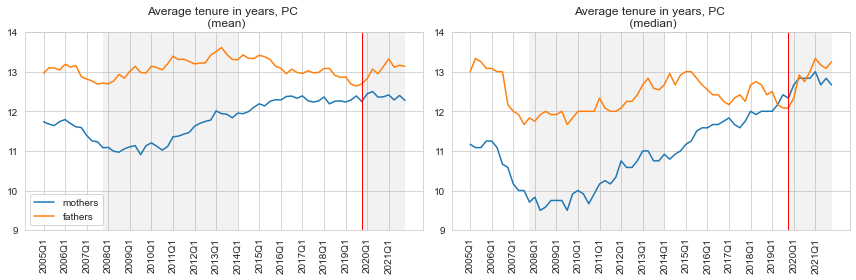

In [45]:
t00 = 59
t0 = int(ten_mo['Mean'].index[0])-t00

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Average tenure in years, PC \n (mean)')
plt.plot(dates[t0:],ten_mo_p['Mean']/12,label='mothers')
plt.plot(dates[t0:],ten_fa_p['Mean']/12,label='fathers')
plt.axvline('2019Q4',c='r',lw=1)
plt.ylim(9,14)
plt.legend()
plt.xticks(dates[t0::4],rotation=90)
plt.axvspan('2007Q4', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2019Q4', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.subplot(122)
plt.title('Average tenure in years, PC \n (median)')
plt.plot(dates[t0:],ten_mo_p['p50']/12,label='mothers')
plt.plot(dates[t0:],ten_fa_p['p50']/12,label='fathers')
plt.axvline('2019Q4',c='r',lw=1)
plt.xticks(dates[t0::4],rotation=90)
plt.axvspan('2007Q4', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2019Q4', '2021Q4', color='grey', alpha=0.1, lw=0)
plt.ylim(9,14)
plt.tight_layout()
plt.savefig('./plots_tenure/ten_timeline_p.pdf',format='pdf',bbox_inches='tight')
plt.show()

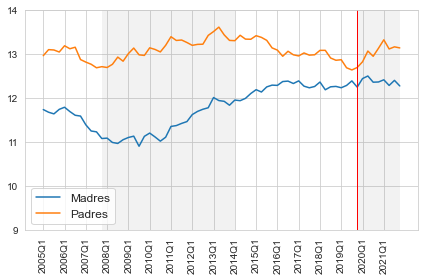

In [11]:
t00 = 59
t0 = int(ten_mo['Mean'].index[0])-t00

plt.figure(figsize=(6,4))
# plt.title('Antigüedad media en el empleo (años)',fontsize=14, y=1.05)
plt.plot(dates[t0:],ten_mo_p['Mean']/12,label='Madres')
plt.plot(dates[t0:],ten_fa_p['Mean']/12,label='Padres')
plt.axvline('2019Q4',c='r',lw=1)
plt.ylim(9,14)
plt.legend(fontsize=12)
plt.xticks(dates[t0::4],rotation=90)
plt.axvspan('2007Q4', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2019Q4', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/ten_timeline_p.png',format='png',bbox_inches='tight')
plt.show()

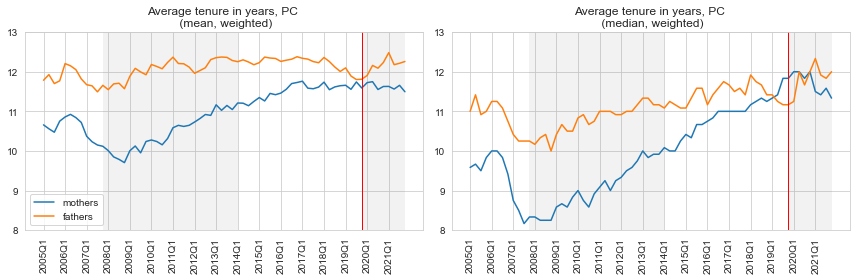

In [46]:
t00 = 59
t0 = int(ten_w_mo['Mean'].index[0])-t00

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Average tenure in years, PC \n (mean, weighted)')
plt.plot(dates[t0:],ten_w_mo_p['Mean']/12,label='mothers')
plt.plot(dates[t0:],ten_w_fa_p['Mean']/12,label='fathers')
plt.axvline('2019Q4',c='r',lw=1)
plt.ylim(8,13.)
plt.legend(loc='lower left')
plt.xticks(dates[t0::4],rotation=90)
plt.axvspan('2007Q4', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2019Q4', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.subplot(122)
plt.title('Average tenure in years, PC \n (median, weighted)')
plt.plot(dates[t0:],ten_w_mo_p['p50']/12,label='mothers')
plt.plot(dates[t0:],ten_w_fa_p['p50']/12,label='fathers')
plt.axvline('2019Q4',c='r',lw=1)
plt.xticks(dates[t0::4],rotation=90)
plt.ylim(8,13.)
plt.axvspan('2007Q4', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2019Q4', '2021Q4', color='grey', alpha=0.1, lw=0)
plt.tight_layout()
plt.savefig('./plots_tenure/ten_timeline_p.pdf',format='pdf',bbox_inches='tight')
plt.show()

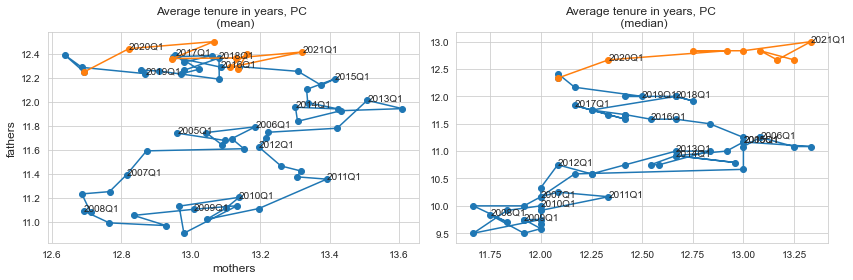

In [47]:
t00 = int(ten_mo['Mean'].index[0])
t0 = int(ten_mo['Mean'].index[0])-59
t = date_dict_reverse_ciclo['2019Q4']-t00

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Average tenure in years, PC \n (mean)')
plt.plot((ten_fa_p['Mean']/12.0)[:t+1],(ten_mo_p['Mean']/12.0)[:t+1],marker='o')
plt.plot((ten_fa_p['Mean']/12.0)[t:],(ten_mo_p['Mean']/12.0)[t:],marker='o')
# plt.plot(dates[t0:],ten_fa_p['Mean']/12,label='fathers')
# plt.axvline('2019Q4',c='r',lw=1)
for ti,dt in enumerate(dates[t0::4]):
    plt.annotate(dt,[(ten_fa_p['Mean']/12.0)[ti*4],(ten_mo_p['Mean']/12.0)[ti*4]])
plt.ylabel('fathers',rotation=90,fontsize=12)
plt.xlabel('mothers',fontsize=12)
# plt.legend()
# plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Average tenure in years, PC \n (median)')
plt.plot((ten_fa_p['p50']/12.0)[:t+1],(ten_mo_p['p50']/12.0)[:t+1],marker='o')
plt.plot((ten_fa_p['p50']/12.0)[t:],(ten_mo_p['p50']/12.0)[t:],marker='o')
for ti,dt in enumerate(dates[t0::4]):
    plt.annotate(dt,[(ten_fa_p['p50']/12.0)[ti*4],(ten_mo_p['p50']/12.0)[ti*4]])
# plt.plot(dates[t0:],,label='fathers')
# plt.axvline('2019Q4',c='r',lw=1)
# plt.xticks(rotation=90)
# plt.ylim(10.5,13.5)
plt.tight_layout()
plt.show()

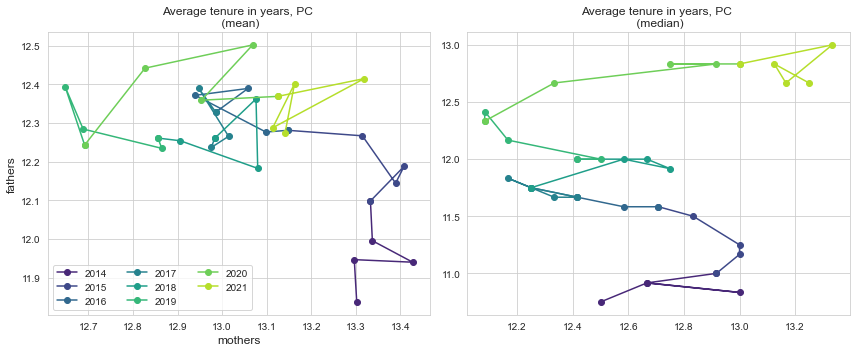

In [167]:
years = np.arange(2014,2022,1)
T = years.size
colors = sn.color_palette("viridis",T)
colors_rec = sn.color_palette("rocket")
t00 = int(ten_mo['Mean'].index[0])
t0 = int(ten_mo['Mean'].index[0])-59
t = date_dict_reverse_ciclo['2019Q4']-t00

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Average tenure in years, PC \n (mean)')
for i,ti in enumerate(range(0,T*4,4)):
    plt.plot((ten_fa_p['Mean']/12.0)[ti:(ti+5)],(ten_mo_p['Mean']/12.0)[ti:(ti+5)],marker='o',
             c=colors[i],label=years[i])
# for ti,dt in enumerate(dates[t0::4]):
#     plt.annotate(dt,[(ten_fa_p['Mean']/12.0)[ti*4],(ten_mo_p['Mean']/12.0)[ti*4]])
plt.ylabel('fathers',rotation=90,fontsize=12)
plt.xlabel('mothers',fontsize=12)
plt.legend(ncol=3)
# plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Average tenure in years, PC \n (median)')
for i,ti in enumerate(range(0,T*4,4)):
    plt.plot((ten_fa_p['p50']/12.0)[ti:(ti+5)],(ten_mo_p['p50']/12.0)[ti:(ti+5)],marker='o',
             c=colors[i],label=years[i])
# for ti,dt in enumerate(dates[t0::4]):
#     plt.annotate(dt,[(ten_fa_p['p50']/12.0)[ti*4],(ten_mo_p['p50']/12.0)[ti*4]])
# plt.axvline('2019Q4',c='r',lw=1)
# plt.xticks(rotation=90)
# plt.ylim(10.5,13.5)
plt.tight_layout()
plt.show()

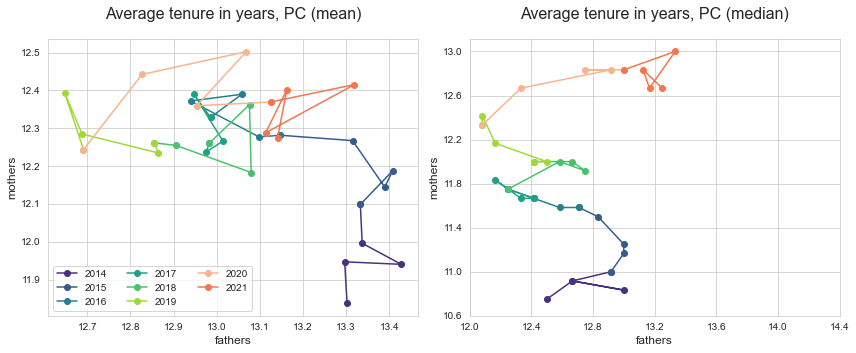

In [254]:
years = np.arange(2014,2020,1)
years_c = np.arange(2020,2022,1)
T, Tc = years.size,years_rec.size
colors = sn.color_palette("viridis",T)
colors_c = sn.color_palette("rocket_r",T)
t00 = int(ten_mo['Mean'].index[0])
t0 = int(ten_mo['Mean'].index[0])-59
t = date_dict_reverse_ciclo['2019Q4']-t00

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Average tenure in years, PC (mean)',fontsize=16,y=1.05)
for i,ti in enumerate(range(0,T*4,4)):
    plt.plot((ten_fa_p['Mean']/12.0)[ti:(ti+5)],(ten_mo_p['Mean']/12.0)[ti:(ti+5)],marker='o',
             c=colors[i],label=years[i])

for i,ti in enumerate(range(T*4,T*4+Tc*4,4)):
    plt.plot((ten_fa_p['Mean']/12.0)[ti:(ti+5)],(ten_mo_p['Mean']/12.0)[ti:(ti+5)],marker='o',
             c=colors_c[i],label=years_c[i])
# for ti,dt in enumerate(dates[t0::4]):
#     plt.annotate(dt,[(ten_fa_p['Mean']/12.0)[ti*4],(ten_mo_p['Mean']/12.0)[ti*4]])
plt.ylabel('mothers',rotation=90,fontsize=12)
plt.xlabel('fathers',fontsize=12)
plt.legend(ncol=3)
# plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Average tenure in years, PC (median)',fontsize=16,y=1.05)
for i,ti in enumerate(range(0,T*4,4)):
    plt.plot((ten_fa_p['p50']/12.0)[ti:(ti+5)],(ten_mo_p['p50']/12.0)[ti:(ti+5)],marker='o',
             c=colors[i],label=years[i])

for i,ti in enumerate(range(T*4,T*4+Tc*4,4)):
    plt.plot((ten_fa_p['p50']/12.0)[ti:(ti+5)],(ten_mo_p['p50']/12.0)[ti:(ti+5)],marker='o',
             c=colors_c[i],label=years_c[i])
plt.xticks(np.arange(12,14.4,0.4))
plt.yticks(np.arange(10.6,13.2,0.4))
# for ti,dt in enumerate(dates[t0::4]):
#     plt.annotate(dt,[(ten_fa_p['p50']/12.0)[ti*4],(ten_mo_p['p50']/12.0)[ti*4]])
plt.ylabel('mothers',rotation=90,fontsize=12)
plt.xlabel('fathers',fontsize=12)
plt.tight_layout()

plt.savefig('./plots_tenure/ten_p.pdf',format='pdf',bbox_inches='tight')
plt.show()

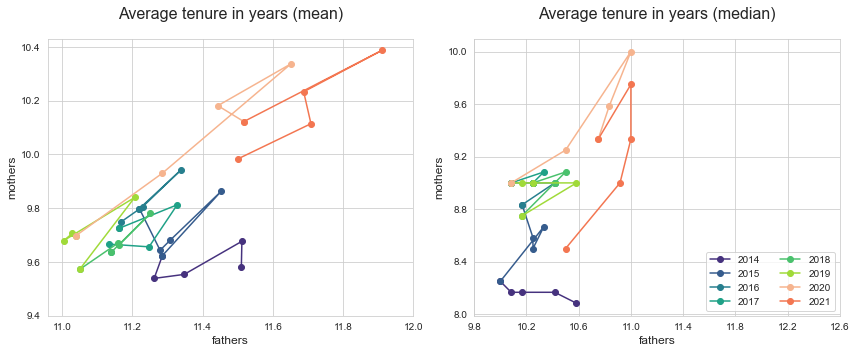

In [255]:
years = np.arange(2014,2020,1)
years_c = np.arange(2020,2022,1)
T, Tc = years.size,years_rec.size
colors = sn.color_palette("viridis",T)
colors_c = sn.color_palette("rocket_r",T)
t00 = int(ten_mo['Mean'].index[0])
t0 = int(ten_mo['Mean'].index[0])-59
t = date_dict_reverse_ciclo['2019Q4']-t00

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Average tenure in years (mean)',fontsize=16,y=1.05)
for i,ti in enumerate(range(0,T*4,4)):
    plt.plot((ten_fa['Mean']/12.0)[ti:(ti+5)],(ten_mo['Mean']/12.0)[ti:(ti+5)],marker='o',
             c=colors[i],label=years[i])

for i,ti in enumerate(range(T*4,T*4+Tc*4,4)):
    plt.plot((ten_fa['Mean']/12.0)[ti:(ti+5)],(ten_mo['Mean']/12.0)[ti:(ti+5)],marker='o',
             c=colors_c[i],label=years_c[i])
    
plt.xticks(np.arange(11,12.2,0.2))
plt.yticks(np.arange(9.4,10.6,0.2))

plt.ylabel('mothers',rotation=90,fontsize=12)
plt.xlabel('fathers',fontsize=12)
# plt.xticks(rotation=90)

plt.subplot(122)
plt.title('Average tenure in years (median)',fontsize=16,y=1.05)
for i,ti in enumerate(range(0,T*4,4)):
    plt.plot((ten_fa['p50']/12.0)[ti:(ti+5)],(ten_mo['p50']/12.0)[ti:(ti+5)],marker='o',
             c=colors[i],label=years[i])

for i,ti in enumerate(range(T*4,T*4+Tc*4,4)):
    plt.plot((ten_fa['p50']/12.0)[ti:(ti+5)],(ten_mo['p50']/12.0)[ti:(ti+5)],marker='o',
             c=colors_c[i],label=years_c[i])

plt.xticks(np.arange(9.8,12.8,0.4))
plt.yticks(np.arange(8,10.2,0.4))

plt.ylabel('mothers',rotation=90,fontsize=12)
plt.xlabel('fathers',fontsize=12)
plt.legend(ncol=2,loc='lower right')

plt.tight_layout()
plt.savefig('./plots_tenure/ten.pdf',format='pdf',bbox_inches='tight')
plt.show()

<a id='heatwave'></a>


## Heatmap plots of tenure - distribution plots

Jump to
 - [Index](#index)
 - [Employment plots](#emp)
 - [Age plots](#age)

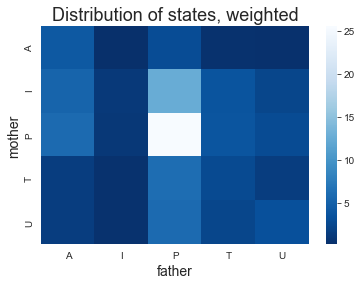

In [6]:
states = ['A', 'I', 'P', 'T', 'U']
N = len(states)
record = 0
values = np.zeros((N,N))
ri= 0 

f = open(path+'state_crosstab_w.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and words[0] in states:
        record=1
    elif record==1:
        buff_v = []
        for w in words[1:1+N]: 
            w = w.replace(",","")
            buff_v.append(w)
        values[ri,:] = np.array(buff_v,dtype=float)
        record=0
        ri+=1
        
state_dist = pd.DataFrame(values, columns=states,index=states)

sn.heatmap(state_dist,cmap=sn.color_palette("Blues_r", as_cmap=True))
plt.title('Distribution of states, weighted',fontsize=18)
plt.ylabel('mother',fontsize=14)
plt.xlabel('father',fontsize=14)
# plt.savefig('./plots_tenure/states_parents_w.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [207]:
state_dist

,A,I,P,T,U
A,4.09,0.27,3.03,0.52,0.51
I,4.02,1.18,10.55,3.01,2.25
P,6.53,1.15,28.10,4.15,2.98
T,1.63,0.49,6.45,2.58,1.48
U,1.73,0.64,6.54,2.58,3.54


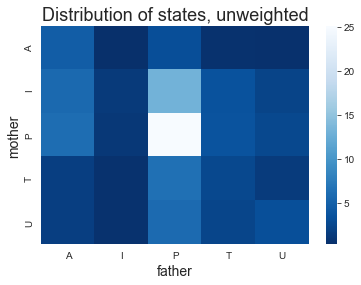

In [7]:
states = ['A', 'I', 'P', 'T', 'U']
N = len(states)
record = 0
values = np.zeros((N,N))
ri= 0 

f = open(path+'state_crosstab.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and words[0] in states:
        record=1
    elif record==1:
        buff_v = []
        for w in words[1:1+N]: 
            w = w.replace(",","")
            buff_v.append(w)
        values[ri,:] = np.array(buff_v,dtype=float)
        record=0
        ri+=1
        
state_dist = pd.DataFrame(values, columns=states,index=states)

sn.heatmap(state_dist,cmap=sn.color_palette("Blues_r", as_cmap=True))
plt.title('Distribution of states, unweighted',fontsize=18)
plt.ylabel('mother',fontsize=14)
plt.xlabel('father',fontsize=14)
plt.savefig('./plots_tenure/states_parents.pdf',format='pdf',bbox_inches='tight')
plt.show()

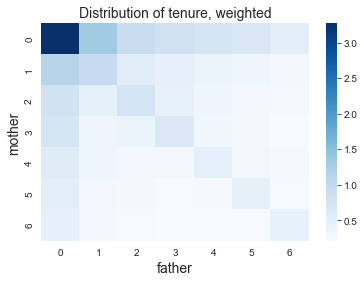

In [21]:
ten_levels = str(np.arange(0,7)).replace('[','').replace(']','').split()
N = len(ten_levels)
record = 0
values = np.zeros((N,N))
ri= 0 

f = open(path+'tenure_crosstab_w.log','r')
for line in f:
    words = line.split()
#     print(words)
    if len(words)>0 and words[0]=="Total":
        break
    if len(words)>0 and words[0] in ten_levels:
        record=1
    elif record==1:
        buff_v = []
        for w in words[1:1+N]: 
            w = w.replace(",","")
            buff_v.append(w)
#             print(buff_v)
        values[ri,:] = np.array(buff_v,dtype=float)
        record=0
        ri+=1
        
ten_dist = pd.DataFrame(values, columns=ten_levels,index=ten_levels)

sn.heatmap(ten_dist,cmap=sn.color_palette("Blues", as_cmap=True))
plt.title('Distribution of tenure, weighted',fontsize=14)
plt.ylabel('mother',fontsize=14)
plt.xlabel('father',fontsize=14)
# plt.savefig('./plots_tenure/states_parents.pdf',format='pdf',bbox_inches='tight')
plt.show()

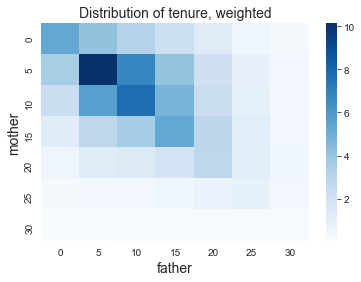

In [50]:
ten_levels = str(np.arange(0,35,5)).replace('[','').replace(']','').split()
N = len(ten_levels)
record = 0
values = np.zeros((N,N))
ri= 0 

f = open(path+'tenure_crosstab_coarse_w.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and words[0] in ten_levels:
        record=1
    elif record==1:
        buff_v = []
        for w in words[1:1+N]: 
            w = w.replace(",","")
            buff_v.append(w)
        values[ri,:] = np.array(buff_v,dtype=float)
        record=0
        ri+=1
        
ten_dist = pd.DataFrame(values, columns=ten_levels,index=ten_levels)

sn.heatmap(ten_dist,cmap=sn.color_palette("Blues", as_cmap=True))
plt.title('Distribution of tenure, weighted',fontsize=14)
plt.ylabel('mother',fontsize=14)
plt.xlabel('father',fontsize=14)
# plt.savefig('./plots_tenure/states_parents.pdf',format='pdf',bbox_inches='tight')
plt.show()

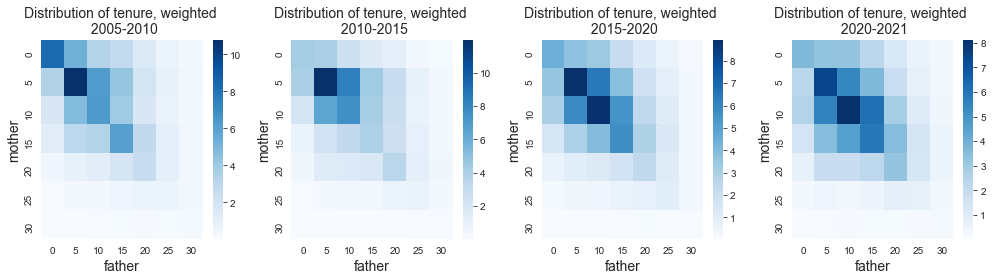

In [16]:
ten_levels = str(np.arange(0,35,5)).replace('[','').replace(']','').split()
N = len(ten_levels)

plt.figure(figsize=(14,4))
for i,ciclo in enumerate(range(130,210,20)):
    plt.subplot(1,4,i+1)
    record = 0
    values = np.zeros((N,N))
    ri= 0 
    f = open(path+'tenure_crosstab_coarse_w_{}.log'.format(ciclo),'r')
    for line in f:
        words = line.split()
        if len(words)>0 and words[0] in ten_levels:
            record=1
        elif record==1:
            buff_v = []
            for w in words[1:1+N]: 
                w = w.replace(",","")
                buff_v.append(w)
            values[ri,:] = np.array(buff_v,dtype=float)
            record=0
            ri+=1

    ten_dist = pd.DataFrame(values, columns=ten_levels,index=ten_levels)

    sn.heatmap(ten_dist,cmap=sn.color_palette("Blues", as_cmap=True))
    year = (i+1)*5+2000
    if year == 2020:
        year1 = 2021
    else:
        year1 = year+5
    plt.title('Distribution of tenure, weighted \n {}-{}'.format(year,year1),fontsize=14)
    plt.ylabel('mother',fontsize=14)
    plt.xlabel('father',fontsize=14)
plt.tight_layout()
# plt.savefig('./plots_tenure/ten_heatmaps_time.pdf',format='pdf',bbox_inches='tight')
plt.show()

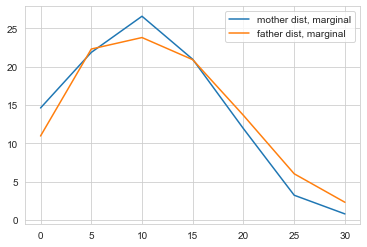

In [489]:
mother_partial_dist = ten_dist.sum(axis=1)
father_partial_dist = ten_dist.sum(axis=0)

plt.plot(mother_partial_dist,label='mother dist, marginal')
plt.plot(father_partial_dist,label='father dist, marginal')
plt.legend()
plt.show()

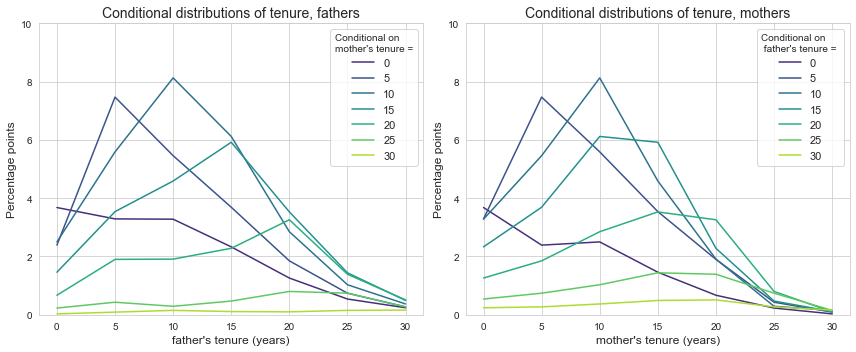

In [9]:
ten_levels = str(np.arange(0,35,5)).replace('[','').replace(']','').split()
N = len(ten_levels)
colors = sn.color_palette("viridis",N)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Conditional distributions of tenure, fathers',fontsize=14)
for i,ten in enumerate(ten_levels):
    plt.plot(ten_dist.loc[ten],label=ten,c=colors[i])
plt.legend(title="Conditional on \nmother's tenure =",fontsize=11)
plt.xlabel("father's tenure (years)",fontsize=12)
plt.ylabel('Percentage points',fontsize=12)
plt.ylim(0,10)

plt.subplot(122)
plt.title('Conditional distributions of tenure, mothers',fontsize=14)
for i,ten in enumerate(ten_levels):
    plt.plot(ten_dist[ten],label=ten,c=colors[i])
plt.legend(title="Conditional on \n father's tenure = ",fontsize=11)
plt.xlabel("mother's tenure (years)",fontsize=12)
plt.ylabel('Percentage points',fontsize=12)
plt.ylim(0,10)
plt.tight_layout()
plt.show()

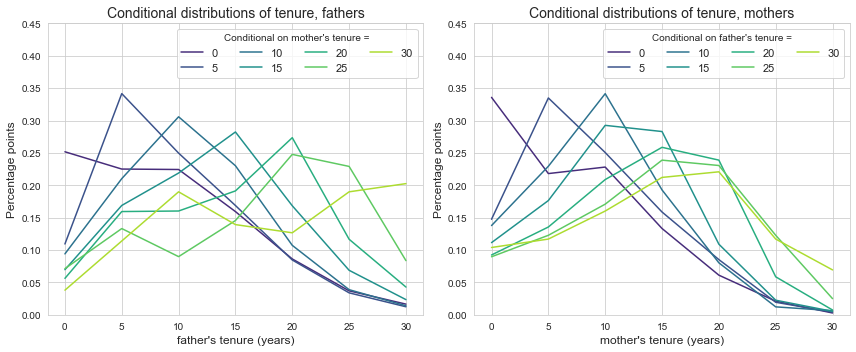

In [10]:
ten_levels = str(np.arange(0,35,5)).replace('[','').replace(']','').split()
N = len(ten_levels)
colors = sn.color_palette("viridis",N)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Conditional distributions of tenure, fathers',fontsize=14)
for i,ten in enumerate(ten_levels):
    plt.plot(ten_dist.loc[ten]/ten_dist.loc[ten].sum(),label=ten,c=colors[i])
plt.legend(title="Conditional on mother's tenure =",fontsize=11,ncol=4)
plt.xlabel("father's tenure (years)",fontsize=12)
plt.ylabel('Percentage points',fontsize=12)
plt.ylim(0,0.45)

plt.subplot(122)
plt.title('Conditional distributions of tenure, mothers',fontsize=14)
for i,ten in enumerate(ten_levels):
    plt.plot(ten_dist[ten]/ten_dist[ten].sum(),label=ten,c=colors[i])
plt.legend(title="Conditional on father's tenure = ",fontsize=11,ncol=4)
plt.xlabel("mother's tenure (years)",fontsize=12)
plt.ylabel('Percentage points',fontsize=12)
plt.ylim(0,0.45)
plt.tight_layout()
# plt.savefig('./plots_tenure/conditional_distributions.pdf',format='pdf',bbox_inches='tight')
plt.show()

### Tenure levels by age group

In [148]:
ten_levels = str(np.arange(0,35,5)).replace('[','').replace(']','').split()
N = len(ten_levels)

ten5_tab_mum =  normalise_table(read_table(path+'ten_g5_mothers_w.log',keyword='ciclo',rescale=100,ncols=N))
ten5_tab_dad =  normalise_table(read_table(path+'ten_g5_fathers_w.log',keyword='ciclo',rescale=100,ncols=N))
ten5_tab_mum_p =  normalise_table(read_table(path+'ten_g5_mothers_fp_w.log',keyword='ciclo',rescale=100,ncols=N))
ten5_tab_dad_p =  normalise_table(read_table(path+'ten_g5_fathers_mp_w.log',keyword='ciclo',rescale=100,ncols=N))

age_brackets = np.arange(20,55,5)
ten5_age_tabs_mum = {}
ten5_age_tabs_dad = {}
ten5_age_tabs_mum_p = {}
ten5_age_tabs_dad_p = {}

for age in age_brackets:
    ten5_age_tabs_mum[age] = normalise_table(read_table(path+'ten_g5_mothers_w_{}.log'.format(age),
                                             keyword='ciclo',endword='Total',rescale=100,ncols=N))
    ten5_age_tabs_dad[age] = normalise_table(read_table(path+'ten_g5_fathers_w_{}.log'.format(age),
                                             keyword='ciclo',endword='Total',rescale=100,ncols=N))
    ten5_age_tabs_mum_p[age] = normalise_table(read_table(path+'ten_g5_mothers_fp_w_{}.log'.format(age),
                                             keyword='ciclo',endword='Total',rescale=100,ncols=N))
    ten5_age_tabs_dad_p[age] = normalise_table(read_table(path+'ten_g5_fathers_mp_w_{}.log'.format(age),
                                             keyword='ciclo',endword='Total',rescale=100,ncols=N))
    

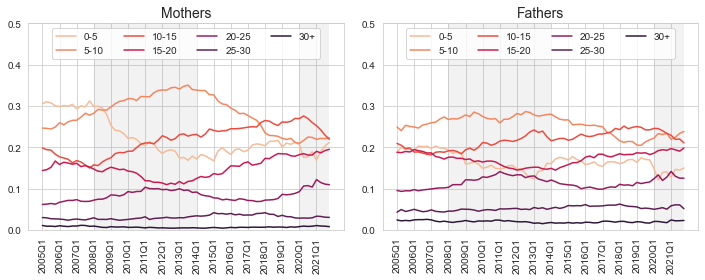

In [71]:
ten_levels = str(np.arange(0,35,5)).replace('[','').replace(']','').split()
ten_levels1 = str(np.arange(5,35,5)).replace('[','').replace(']','').split()
ten_levels1.append('+')

colors = sn.color_palette('rocket_r',N)
ten_data = [ten5_tab_mum,ten5_tab_dad]
titles = ['Mothers','Fathers']

plt.figure(figsize=(10,4))
for j,data in enumerate(ten_data):
    plt.subplot(121+j)
    plt.title(titles[j],fontsize=14)
    for i,ten in enumerate(ten_levels):
        if i==N-1:
            plt.plot(dates[t05:],data[ten],label=ten+ten_levels1[i],c=colors[i])
        else:
            plt.plot(dates[t05:],data[ten],label=ten+'-'+ten_levels1[i],c=colors[i])

    plt.legend(ncol=4,loc='upper center')
    plt.xticks(dates[t05::4],rotation=90)
    plt.ylim(0,0.5)

    plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
    plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)
    
#     plt.fill_between(dates[t05:],data['p25']/12,data['p75']/12,color=reds[0],alpha=0.1)
#     plt.fill_between(dates[t05:],data['p10']/12,data['p25']/12,color=reds[2],alpha=0.1)
#     plt.fill_between(dates[t05:],data['p75']/12,data['p90']/12,color=reds[2],alpha=0.1)

plt.tight_layout()
plt.savefig('./plots_tenure/ten05_dist_w.pdf',format='pdf',bbox_inches='tight')
plt.show()

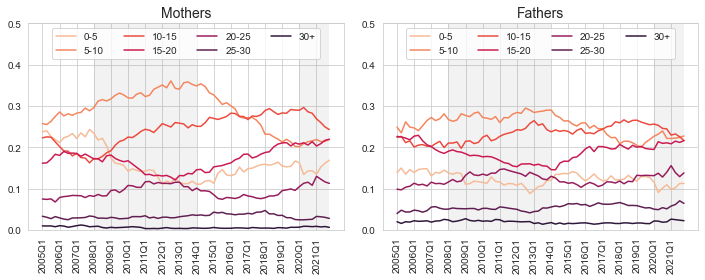

In [149]:
ten_levels = str(np.arange(0,35,5)).replace('[','').replace(']','').split()
ten_levels1 = str(np.arange(5,35,5)).replace('[','').replace(']','').split()
ten_levels1.append('+')

colors = sn.color_palette('rocket_r',N)
ten_data = [ten5_tab_mum_p,ten5_tab_dad_p]
titles = ['Mothers','Fathers']

plt.figure(figsize=(10,4))
for j,data in enumerate(ten_data):
    plt.subplot(121+j)
    plt.title(titles[j],fontsize=14)
    for i,ten in enumerate(ten_levels):
        if i==N-1:
            plt.plot(dates[t05:],data[ten],label=ten+ten_levels1[i],c=colors[i])
        else:
            plt.plot(dates[t05:],data[ten],label=ten+'-'+ten_levels1[i],c=colors[i])

    plt.legend(ncol=4,loc='upper center')
    plt.xticks(dates[t05::4],rotation=90)
    plt.ylim(0,0.5)

    plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
    plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)
    
#     plt.fill_between(dates[t05:],data['p25']/12,data['p75']/12,color=reds[0],alpha=0.1)
#     plt.fill_between(dates[t05:],data['p10']/12,data['p25']/12,color=reds[2],alpha=0.1)
#     plt.fill_between(dates[t05:],data['p75']/12,data['p90']/12,color=reds[2],alpha=0.1)

plt.tight_layout()
plt.savefig('./plots_tenure/ten05_dist_w_p.pdf',format='pdf',bbox_inches='tight')
plt.show()

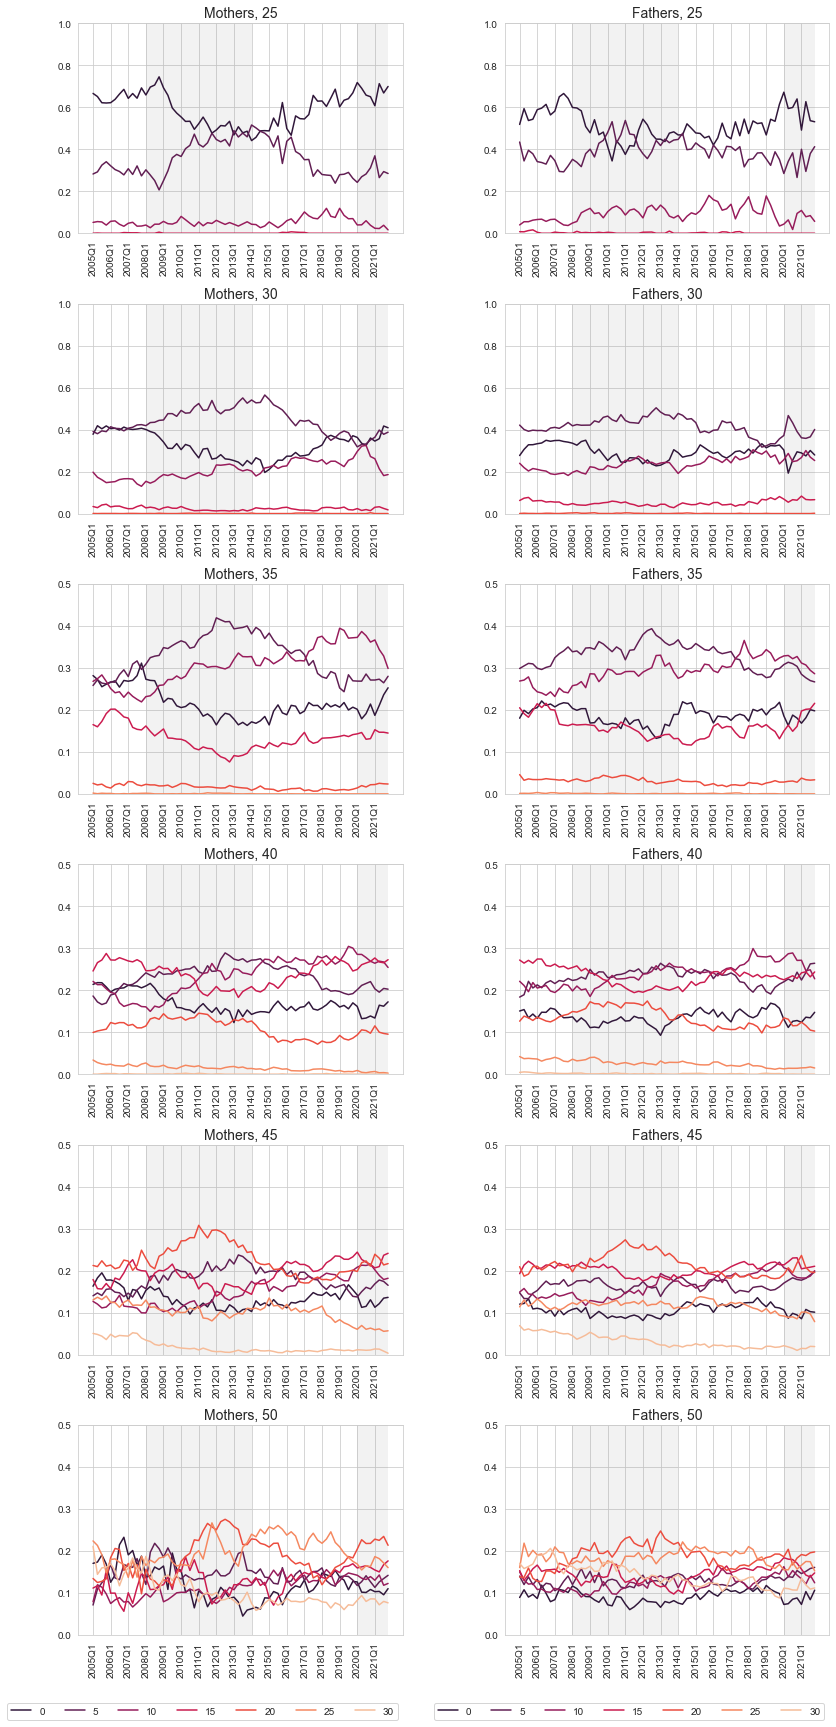

In [159]:
ten_levels = str(np.arange(0,35,5)).replace('[','').replace(']','').split()
N = len(ten_levels)
age_brackets = np.arange(25,55,5)
A = age_brackets.size
titles = ['Mothers','Fathers']
lims = [(0,1),(0,0.5)]
data = [ten5_age_tabs_mum,ten5_age_tabs_dad]
colors = sn.color_palette('rocket',N)
pp = 0
ll = 0

plt.figure(figsize=(12,24))
for j,age in enumerate(age_brackets):
    if age==35:
        ll=1
    for k,kind in enumerate(titles):
        pp +=1
        plt.subplot(A,2,pp)
        plt.title("{}, {}".format(kind,age),fontsize=14)
        for i,ten in enumerate(ten_levels):
            if ten in data[k][age].columns:
                plt.plot(dates[t05:],data[k][age][ten],label=ten,c=colors[i])
        if age==age_brackets[-1]:
            plt.legend(ncol=7,bbox_to_anchor=(1,-0.3))
        plt.xticks(dates[t05::4],rotation=90)
        plt.ylim(lims[ll])

        plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
        plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/ten05_dist_ages_w.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [163]:
plt.yscale?

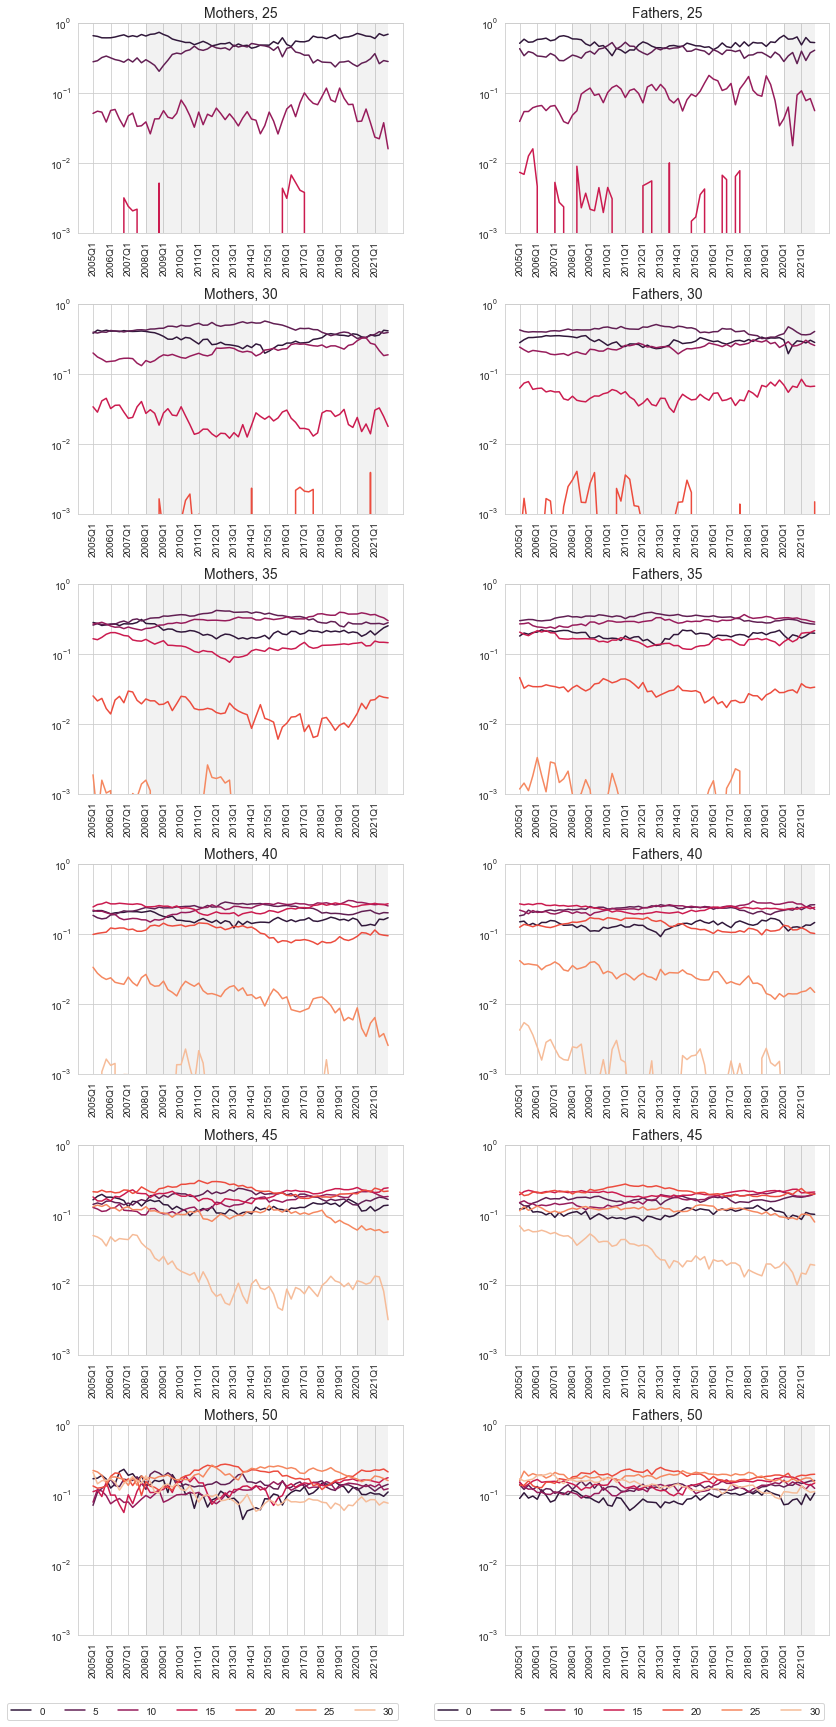

In [169]:
ten_levels = str(np.arange(0,35,5)).replace('[','').replace(']','').split()
N = len(ten_levels)
age_brackets = np.arange(25,55,5)
A = age_brackets.size
titles = ['Mothers','Fathers']
lims = [(0,1),(0,0.5)]
data = [ten5_age_tabs_mum,ten5_age_tabs_dad]
colors = sn.color_palette('rocket',N)
pp = 0
ll = 0

plt.figure(figsize=(12,24))
for j,age in enumerate(age_brackets):
    if age==35:
        ll=1
    for k,kind in enumerate(titles):
        pp +=1
        plt.subplot(A,2,pp)
        plt.title("{}, {}".format(kind,age),fontsize=14)
        for i,ten in enumerate(ten_levels):
            if ten in data[k][age].columns:
                plt.plot(dates[t05:],data[k][age][ten],label=ten,c=colors[i])
        if age==age_brackets[-1]:
            plt.legend(ncol=7,bbox_to_anchor=(1,-0.3))
        plt.xticks(dates[t05::4],rotation=90)
        plt.yscale('log')
        plt.ylim(10e-4,1)        

        plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
        plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/ten05_dist_ages_logscale_w.pdf',format='pdf',bbox_inches='tight')
plt.show()

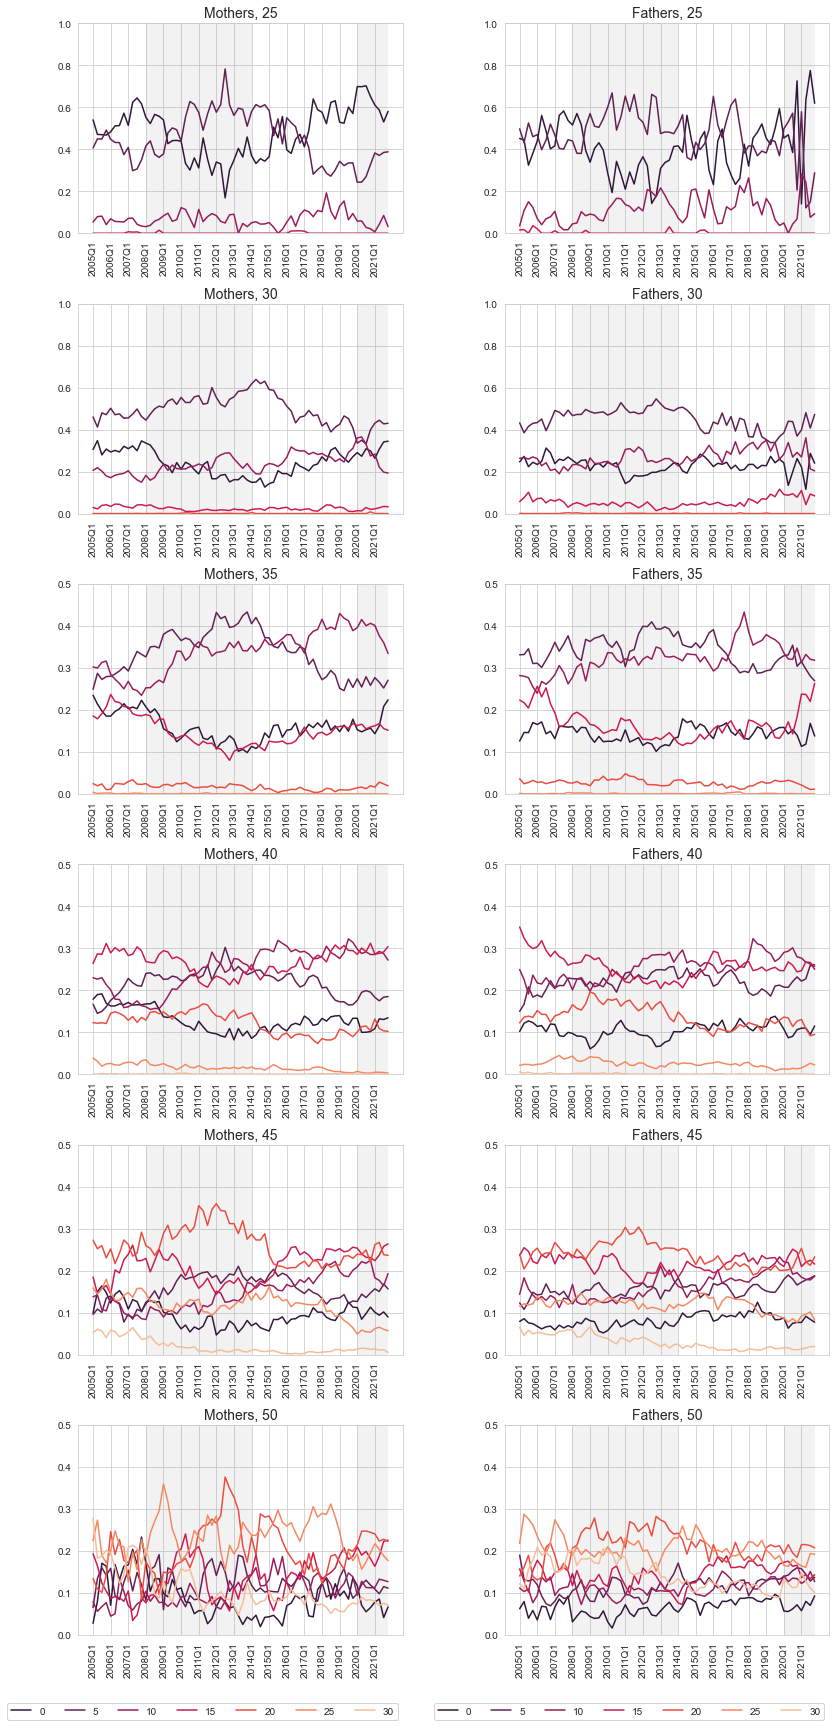

In [158]:
ten_levels = str(np.arange(0,35,5)).replace('[','').replace(']','').split()
N = len(ten_levels)
age_brackets = np.arange(25,55,5)
A = age_brackets.size
titles = ['Mothers','Fathers']
lims = [(0,1),(0,0.5)]
data = [ten5_age_tabs_mum_p,ten5_age_tabs_dad_p]
colors = sn.color_palette('rocket',N)
pp = 0
ll = 0

plt.figure(figsize=(12,24))
for j,age in enumerate(age_brackets):
    if age==35:
        ll=1
    for k,kind in enumerate(titles):
        pp +=1
        plt.subplot(A,2,pp)
        plt.title("{}, {}".format(kind,age),fontsize=14)
        for i,ten in enumerate(ten_levels):
            if ten in data[k][age].columns:
                plt.plot(dates[t05:],data[k][age][ten],label=ten,c=colors[i])
        if age==age_brackets[-1]:
            plt.legend(ncol=7,bbox_to_anchor=(1,-0.3))
        plt.xticks(dates[t05::4],rotation=90)
        plt.ylim(lims[ll])

        plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
        plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/ten05_dist_ages_w_p.pdf',format='pdf',bbox_inches='tight')
plt.show()

<a id='emp'></a>


## Employment plots

Jump to
 - [Index](#index)
 - [Tenure Heatmaps](#heatwave)
 - [Age plots](#age)
 - [hours plots](#hours)

In [22]:
path = './rawtabs_dem/'

emp_tab_mum = normalise_table(read_table(path+'employment_mothers_w.log',keyword='ciclo',rescale=1,ncols=5))
emp_tab_dad = normalise_table(read_table(path+'employment_fathers_w.log',keyword='ciclo',rescale=1,ncols=5))

pt_tab_mum = normalise_table(read_table(path+'employment_pt_mothers_w.log',keyword='ciclo',rescale=1,ncols=5))
pt_tab_dad = normalise_table(read_table(path+'employment_pt_fathers_w.log',keyword='ciclo',rescale=1,ncols=5))

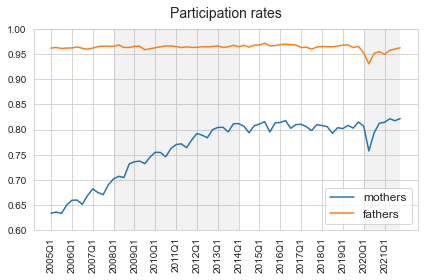

In [443]:
plt.title('Participation rates',y=1.025, fontsize=14)
plt.plot(dates[t0:],1-emp_tab_mum['I'],label='mothers')
plt.plot(dates[t0:],1-emp_tab_dad['I'],label='fathers')
plt.xticks(dates[t0::4],rotation=90)
plt.legend(fontsize=12)
plt.ylim(0.6,1)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/participation_rates.pdf',format='pdf',bbox_inches='tight')
plt.show()

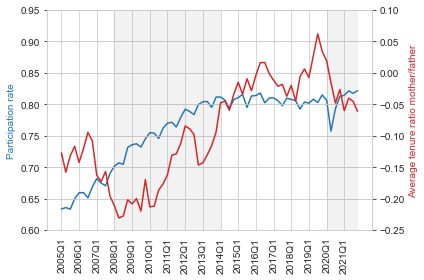

In [149]:
colors = sn.color_palette()

fig, ax1 = plt.subplots(figsize=(6,4))
# for c,s in zip(colors[1:],states):
#     ax1.plot(flows_p['dates'],flows_p[s0+s]/flows_p['Total'],label=s0+s,c=c)
ax1.plot(dates[t0:],1-emp_tab_mum['I'],label='mothers')
ax1.set_ylabel('Participation rate', color=colors[0])
# ax1.plot(dates[t0:],1-emp_tab_dad['I'],label='fathers')
ax1.set_ylim(0.6,0.95)
# plt.xlim(0,T)
plt.xticks(dates[t0::4],rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average tenure ratio mother/father', color=colors[3])  # we already handled the x-label with ax1
ax2.plot(dates[t0:],ratio_tab_w_p['Mean'],label='tenure ratio',color=colors[3])
# ax2.plot(flows_p_alt['dates'],flows_p_alt["PP"]/flows_p_alt['Total'],label="PP",c=colors[0],ls='--')
# ax2.tick_params(axis='y', labelcolor=colors[0])
ax2.set_ylim(-0.25,0.1)

plt.xticks(dates[t0::4],rotation=90)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/tenureratio_vs_participation.pdf',format='pdf',bbox_inches='tight')

plt.show()

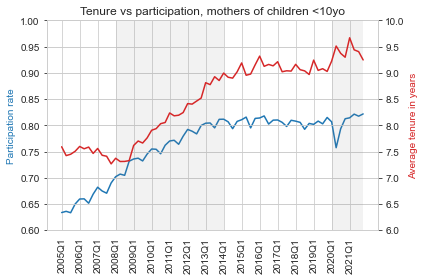

In [332]:
colors = sn.color_palette()

fig, ax1 = plt.subplots(figsize=(6,4))
plt.title('Tenure vs participation, mothers of children <10yo')
# for c,s in zip(colors[1:],states):
#     ax1.plot(flows_p['dates'],flows_p[s0+s]/flows_p['Total'],label=s0+s,c=c)
ax1.plot(dates[t0:],1-emp_tab_mum['I'],label='mothers')
ax1.set_ylabel('Participation rate', color=colors[0])
# ax1.plot(dates[t0:],1-emp_tab_dad['I'],label='fathers')
ax1.set_ylim(0.6,1)
# plt.xlim(0,T)
plt.xticks(dates[t0::4],rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average tenure in years', color=colors[3])  # we already handled the x-label with ax1
ax2.plot(dates[t0:],ten_w_mo['Mean']/12,label='tenure in years',color=colors[3])
# ax2.plot(flows_p_alt['dates'],flows_p_alt["PP"]/flows_p_alt['Total'],label="PP",c=colors[0],ls='--')
# ax2.tick_params(axis='y', labelcolor=colors[0])
ax2.set_ylim(6,10)

plt.xticks(dates[t0::4],rotation=90)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/tenure_vs_participation.pdf',format='pdf',bbox_inches='tight')

plt.show()

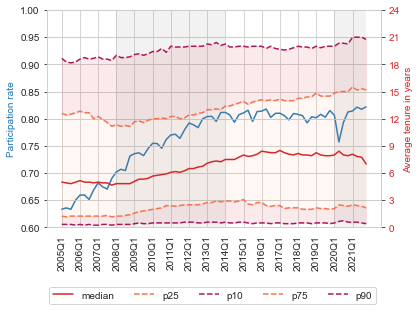

In [487]:
colors = sn.color_palette()
reds = sn.color_palette('rocket_r')

fig, ax1 = plt.subplots(figsize=(6,4))
# plt.title('Tenure vs participation, mothers of children <10yo')
# for c,s in zip(colors[1:],states):
#     ax1.plot(flows_p['dates'],flows_p[s0+s]/flows_p['Total'],label=s0+s,c=c)
ax1.plot(dates[t0:],1-emp_tab_mum['I'],label='mothers')
ax1.set_ylabel('Participation rate', color=colors[0])
# ax1.plot(dates[t0:],1-emp_tab_dad['I'],label='fathers')
ax1.set_ylim(0.6,1)
# plt.xlim(0,T)
plt.xticks(dates[t0::4],rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average tenure in years', color=colors[3])  # we already handled the x-label with ax1
# ax2.plot(dates[t0:],ten_w_mo['Mean']/12,label='tenure in years',color=colors[3])

ax2.plot(dates[t0:],ten_w_mo['p50']/12,label='median',color=colors[3])
ax2.plot(dates[t0:],ten_w_mo['p25']/12,label='p25',color=reds[1],ls='--')
ax2.plot(dates[t0:],ten_w_mo['p10']/12,label='p10',color=reds[3],ls='--')
ax2.plot(dates[t0:],ten_w_mo['p75']/12,label='p75',color=reds[1],ls='--')
ax2.plot(dates[t0:],ten_w_mo['p90']/12,label='p90',color=reds[3],ls='--')

ax2.fill_between(dates[t0:],ten_w_mo['p25']/12,ten_w_mo['p75']/12,color=reds[0],alpha=0.1)
ax2.fill_between(dates[t0:],ten_w_mo['p10']/12,ten_w_mo['p25']/12,color=reds[2],alpha=0.1)
ax2.fill_between(dates[t0:],ten_w_mo['p75']/12,ten_w_mo['p90']/12,color=reds[2],alpha=0.1)
ax2.tick_params(axis='y', labelcolor=colors[3])
ax2.set_ylim(0,24)
ax2.set_yticks(np.arange(0,27,3))


plt.xticks(dates[t0::4],rotation=90)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)
ax2.legend(ncol=5,bbox_to_anchor=(1,-0.25))

# plt.tight_layout()
plt.savefig('./plots_tenure/tenure_vs_participation_dist.pdf',format='pdf',bbox_inches='tight')

plt.show()

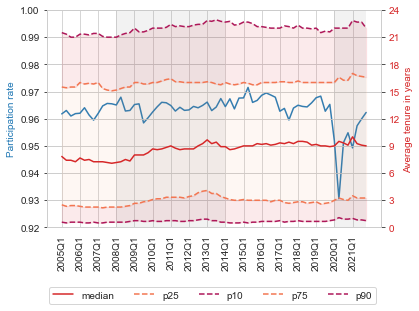

In [486]:
colors = sn.color_palette()
reds = sn.color_palette('rocket_r')

fig, ax1 = plt.subplots(figsize=(6,4))
# plt.title('Tenure vs participation, mothers of children <10yo')
# for c,s in zip(colors[1:],states):
#     ax1.plot(flows_p['dates'],flows_p[s0+s]/flows_p['Total'],label=s0+s,c=c)
ax1.plot(dates[t0:],1-emp_tab_dad['I'],label='mothers')
ax1.set_ylabel('Participation rate', color=colors[0])
# ax1.plot(dates[t0:],1-emp_tab_dad['I'],label='fathers')
ax1.set_ylim(0.92,1)
# plt.xlim(0,T)
plt.xticks(dates[t0::4],rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average tenure in years', color=colors[3])  # we already handled the x-label with ax1
# ax2.plot(dates[t0:],ten_w_fa['Mean']/12,label='tenure in years',color=colors[3])

ax2.plot(dates[t0:],ten_w_fa['p50']/12,label='median',color=colors[3])
ax2.plot(dates[t0:],ten_w_fa['p25']/12,label='p25',color=reds[1],ls='--')
ax2.plot(dates[t0:],ten_w_fa['p10']/12,label='p10',color=reds[3],ls='--')
ax2.plot(dates[t0:],ten_w_fa['p75']/12,label='p75',color=reds[1],ls='--')
ax2.plot(dates[t0:],ten_w_fa['p90']/12,label='p90',color=reds[3],ls='--')

ax2.fill_between(dates[t0:],ten_w_fa['p25']/12,ten_w_fa['p75']/12,color=reds[0],alpha=0.1)
ax2.fill_between(dates[t0:],ten_w_fa['p10']/12,ten_w_fa['p25']/12,color=reds[2],alpha=0.1)
ax2.fill_between(dates[t0:],ten_w_fa['p75']/12,ten_w_fa['p90']/12,color=reds[2],alpha=0.1)
ax2.tick_params(axis='y', labelcolor=colors[3])
ax2.set_ylim(0,24)
ax2.set_yticks(np.arange(0,27,3))
ax2.legend(ncol=5,bbox_to_anchor=(1,-0.25))

plt.xticks(dates[t0::4],rotation=90)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

# plt.tight_layout()
plt.savefig('./plots_tenure/tenure_vs_participation_dist_fathers.pdf',format='pdf',bbox_inches='tight')

plt.show()

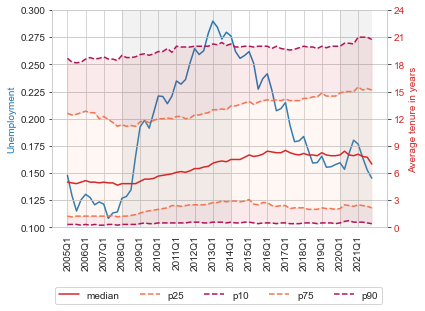

In [483]:
colors = sn.color_palette()
reds = sn.color_palette('rocket_r')

fig, ax1 = plt.subplots(figsize=(6,4))
# plt.title('Tenure vs participation, mothers of children <10yo')
# for c,s in zip(colors[1:],states):
#     ax1.plot(flows_p['dates'],flows_p[s0+s]/flows_p['Total'],label=s0+s,c=c)
ax1.plot(dates[t0:],emp_tab_mum['U']/(1-emp_tab_mum['I']),label='mothers')
ax1.set_ylabel('Unemployment', color=colors[0])
# ax1.plot(dates[t0:],1-emp_tab_dad['I'],label='fathers')
ax1.set_ylim(0.1,0.3)
# plt.xlim(0,T)
plt.xticks(dates[t0::4],rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average tenure in years', color=colors[3])  # we already handled the x-label with ax1
# ax2.plot(dates[t0:],ten_w_mo['Mean']/12,label='tenure in years',color=colors[3])

ax2.plot(dates[t0:],ten_w_mo['p50']/12,label='median',color=colors[3])
ax2.plot(dates[t0:],ten_w_mo['p25']/12,label='p25',color=reds[1],ls='--')
ax2.plot(dates[t0:],ten_w_mo['p10']/12,label='p10',color=reds[3],ls='--')
ax2.plot(dates[t0:],ten_w_mo['p75']/12,label='p75',color=reds[1],ls='--')
ax2.plot(dates[t0:],ten_w_mo['p90']/12,label='p90',color=reds[3],ls='--')

ax2.fill_between(dates[t0:],ten_w_mo['p25']/12,ten_w_mo['p75']/12,color=reds[0],alpha=0.1)
ax2.fill_between(dates[t0:],ten_w_mo['p10']/12,ten_w_mo['p25']/12,color=reds[2],alpha=0.1)
ax2.fill_between(dates[t0:],ten_w_mo['p75']/12,ten_w_mo['p90']/12,color=reds[2],alpha=0.1)
ax2.tick_params(axis='y', labelcolor=colors[3])
ax2.set_ylim(0,24)
ax2.set_yticks(np.arange(0,27,3))
ax2.legend(ncol=5,bbox_to_anchor=(1,-0.25))


plt.xticks(dates[t0::4],rotation=90)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

# plt.tight_layout()
plt.savefig('./plots_tenure/tenure_vs_unemp_dist.pdf',format='pdf',bbox_inches='tight')

plt.show()

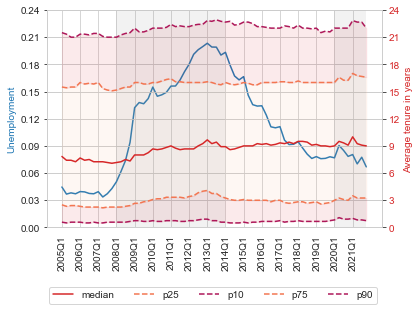

In [482]:
colors = sn.color_palette()
reds = sn.color_palette('rocket_r')

fig, ax1 = plt.subplots(figsize=(6,4))
# plt.title('Tenure vs participation, mothers of children <10yo')
# for c,s in zip(colors[1:],states):
#     ax1.plot(flows_p['dates'],flows_p[s0+s]/flows_p['Total'],label=s0+s,c=c)
ax1.plot(dates[t0:],emp_tab_dad['U']/(1-emp_tab_dad['I']),label='mothers')
ax1.set_ylabel('Unemployment', color=colors[0])
# ax1.plot(dates[t0:],1-emp_tab_dad['I'],label='fathers')
ax1.set_yticks(np.arange(0,0.27,0.03))
ax1.set_ylim(0.0,0.24)
plt.xticks(dates[t0::4],rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average tenure in years', color=colors[3])  # we already handled the x-label with ax1
# ax2.plot(dates[t0:],ten_w_fa['Mean']/12,label='tenure in years',color=colors[3])

ax2.plot(dates[t0:],ten_w_fa['p50']/12,label='median',color=colors[3])
ax2.plot(dates[t0:],ten_w_fa['p25']/12,label='p25',color=reds[1],ls='--')
ax2.plot(dates[t0:],ten_w_fa['p10']/12,label='p10',color=reds[3],ls='--')
ax2.plot(dates[t0:],ten_w_fa['p75']/12,label='p75',color=reds[1],ls='--')
ax2.plot(dates[t0:],ten_w_fa['p90']/12,label='p90',color=reds[3],ls='--')

ax2.fill_between(dates[t0:],ten_w_fa['p25']/12,ten_w_fa['p75']/12,color=reds[0],alpha=0.1)
ax2.fill_between(dates[t0:],ten_w_fa['p10']/12,ten_w_fa['p25']/12,color=reds[2],alpha=0.1)
ax2.fill_between(dates[t0:],ten_w_fa['p75']/12,ten_w_fa['p90']/12,color=reds[2],alpha=0.1)
ax2.tick_params(axis='y', labelcolor=colors[3])
ax2.set_ylim(0,24)
ax2.set_yticks(np.arange(0,27,3))
ax2.legend(ncol=5,bbox_to_anchor=(1,-0.25))


plt.xticks(dates[t0::4],rotation=90)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

# plt.tight_layout()
plt.savefig('./plots_tenure/tenure_vs_unemp_dist_fathers.pdf',format='pdf',bbox_inches='tight')

plt.show()

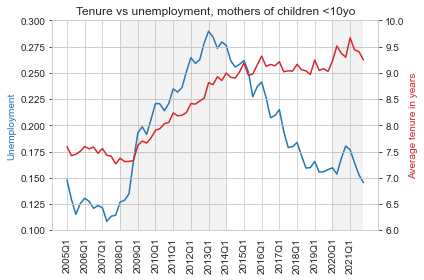

In [154]:
colors = sn.color_palette()

fig, ax1 = plt.subplots(figsize=(6,4))
plt.title('Tenure vs unemployment, mothers of children <10yo')
# for c,s in zip(colors[1:],states):
#     ax1.plot(flows_p['dates'],flows_p[s0+s]/flows_p['Total'],label=s0+s,c=c)
ax1.plot(dates[t0:],emp_tab_mum['U']/(1-emp_tab_mum['I']),label='mothers')
ax1.set_ylabel('Unemployment', color=colors[0])
# ax1.plot(dates[t0:],1-emp_tab_dad['I'],label='fathers')
ax1.set_ylim(0.1,0.3)
# plt.xlim(0,T)
plt.xticks(dates[t0::4],rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average tenure in years', color=colors[3])  # we already handled the x-label with ax1
ax2.plot(dates[t0:],ten_w_mo['Mean']/12,label='tenure in years',color=colors[3])
# ax2.plot(flows_p_alt['dates'],flows_p_alt["PP"]/flows_p_alt['Total'],label="PP",c=colors[0],ls='--')
# ax2.tick_params(axis='y', labelcolor=colors[0])
ax2.set_ylim(6,10)

plt.xticks(dates[t0::4],rotation=90)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/tenure_vs_unemployment.pdf',format='pdf',bbox_inches='tight')

plt.show()

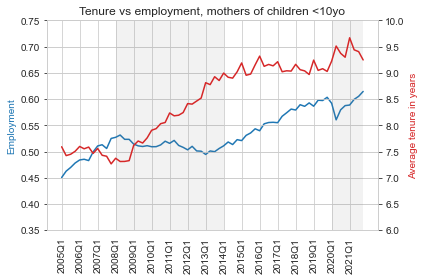

In [195]:
colors = sn.color_palette()

fig, ax1 = plt.subplots(figsize=(6,4))
plt.title('Tenure vs employment, mothers of children <10yo')
# for c,s in zip(colors[1:],states):
#     ax1.plot(flows_p['dates'],flows_p[s0+s]/flows_p['Total'],label=s0+s,c=c)
ax1.plot(dates[t0:],emp_tab_mum['T']+emp_tab_mum['P'],label='employment')
ax1.set_ylabel('Employment', color=colors[0])
# ax1.plot(dates[t0:],1-emp_tab_dad['I'],label='fathers')
ax1.set_ylim(0.35,0.75)
# plt.xlim(0,T)
plt.xticks(dates[t0::4],rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average tenure in years', color=colors[3])  # we already handled the x-label with ax1
ax2.plot(dates[t0:],ten_w_mo['Mean']/12,label='tenure in years',color=colors[3])
# ax2.tick_params(axis='y', labelcolor=colors[0])
ax2.set_ylim(6,10)

plt.xticks(dates[t0::4],rotation=90)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/tenure_vs_employment.pdf',format='pdf',bbox_inches='tight')

plt.show()

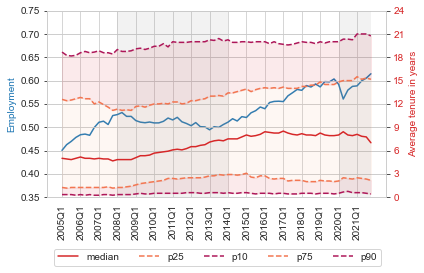

In [465]:
colors = sn.color_palette()
reds = sn.color_palette('rocket_r')

fig, ax1 = plt.subplots(figsize=(6,4))
# plt.title('Tenure vs participation, mothers of children <10yo')
# for c,s in zip(colors[1:],states):
#     ax1.plot(flows_p['dates'],flows_p[s0+s]/flows_p['Total'],label=s0+s,c=c)
ax1.plot(dates[t0:],emp_tab_mum['T']+emp_tab_mum['P'],label='employment')
ax1.set_ylabel('Employment', color=colors[0])
ax1.set_ylim(0.35,0.75)
plt.xticks(dates[t0::4],rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average tenure in years', color=colors[3])  # we already handled the x-label with ax1
ax2.plot(dates[t0:],ten_w_mo['p50']/12,label='median',color=colors[3])
ax2.plot(dates[t0:],ten_w_mo['p25']/12,label='p25',color=reds[1],ls='--')
ax2.plot(dates[t0:],ten_w_mo['p10']/12,label='p10',color=reds[3],ls='--')
ax2.plot(dates[t0:],ten_w_mo['p75']/12,label='p75',color=reds[1],ls='--')
ax2.plot(dates[t0:],ten_w_mo['p90']/12,label='p90',color=reds[3],ls='--')

ax2.fill_between(dates[t0:],ten_w_mo['p25']/12,ten_w_mo['p75']/12,color=reds[0],alpha=0.1)
ax2.fill_between(dates[t0:],ten_w_mo['p10']/12,ten_w_mo['p25']/12,color=reds[2],alpha=0.1)
ax2.fill_between(dates[t0:],ten_w_mo['p75']/12,ten_w_mo['p90']/12,color=reds[2],alpha=0.1)
ax2.tick_params(axis='y', labelcolor=colors[3])
ax2.set_ylim(0,24)
ax2.set_yticks(np.arange(0,27,3))
ax2.legend(ncol=5,bbox_to_anchor=(1,-0.25))


plt.xticks(dates[t0::4],rotation=90)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/tenure_vs_emp_dist.pdf',format='pdf',bbox_inches='tight')
# 
plt.show()

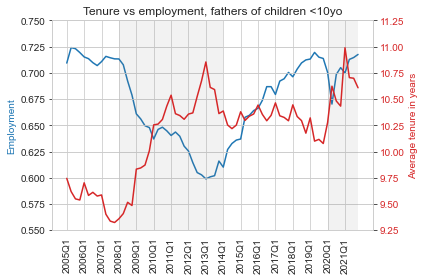

In [264]:
colors = sn.color_palette()

fig, ax1 = plt.subplots(figsize=(6,4))
plt.title('Tenure vs employment, fathers of children <10yo')
# for c,s in zip(colors[1:],states):
#     ax1.plot(flows_p['dates'],flows_p[s0+s]/flows_p['Total'],label=s0+s,c=c)
ax1.plot(dates[t0:],emp_tab_dad['T']+emp_tab_dad['P'],label='employment')
ax1.set_ylabel('Employment', color=colors[0])
ax1.set_ylim(0.55,0.75)
# plt.xlim(0,T)
plt.xticks(dates[t0::4],rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average tenure in years', color=colors[3])  # we already handled the x-label with ax1
ax2.plot(dates[t0:],ten_w_fa['Mean']/12,label='tenure in years',color=colors[3])
ax2.tick_params(axis='y', labelcolor=colors[3])
ax2.set_ylim(9.25,11.25)

plt.xticks(dates[t0::4],rotation=90)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/tenure_vs_employment_fathers.pdf',format='pdf',bbox_inches='tight')

plt.show()

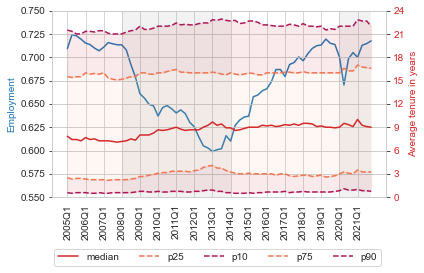

In [466]:
colors = sn.color_palette()

fig, ax1 = plt.subplots(figsize=(6,4))
# plt.title('Tenure vs employment, fathers of children <10yo')
# for c,s in zip(colors[1:],states):
#     ax1.plot(flows_p['dates'],flows_p[s0+s]/flows_p['Total'],label=s0+s,c=c)
ax1.plot(dates[t0:],emp_tab_dad['T']+emp_tab_dad['P'],label='employment')
ax1.set_ylabel('Employment', color=colors[0])
ax1.set_ylim(0.55,0.75)
# plt.xlim(0,T)
plt.xticks(dates[t0::4],rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average tenure in years', color=colors[3])  # we already handled the x-label with ax1
ax2.plot(dates[t0:],ten_w_fa['p50']/12,label='median',color=colors[3])
ax2.plot(dates[t0:],ten_w_fa['p25']/12,label='p25',color=reds[1],ls='--')
ax2.plot(dates[t0:],ten_w_fa['p10']/12,label='p10',color=reds[3],ls='--')
ax2.plot(dates[t0:],ten_w_fa['p75']/12,label='p75',color=reds[1],ls='--')
ax2.plot(dates[t0:],ten_w_fa['p90']/12,label='p90',color=reds[3],ls='--')

ax2.fill_between(dates[t0:],ten_w_fa['p25']/12,ten_w_fa['p75']/12,color=reds[0],alpha=0.1)
ax2.fill_between(dates[t0:],ten_w_fa['p10']/12,ten_w_fa['p25']/12,color=reds[2],alpha=0.1)
ax2.fill_between(dates[t0:],ten_w_fa['p75']/12,ten_w_fa['p90']/12,color=reds[2],alpha=0.1)
# ax2.plot(flows_p_alt['dates'],flows_p_alt["PP"]/flows_p_alt['Total'],label="PP",c=colors[0],ls='--')
ax2.tick_params(axis='y', labelcolor=colors[3])
ax2.set_ylim(0,24)
ax2.set_yticks(np.arange(0,27,3))
ax2.legend(ncol=5,bbox_to_anchor=(1,-0.25))

plt.xticks(dates[t0::4],rotation=90)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/tenure_vs_employment_dist_fathers.pdf',format='pdf',bbox_inches='tight')

plt.show()

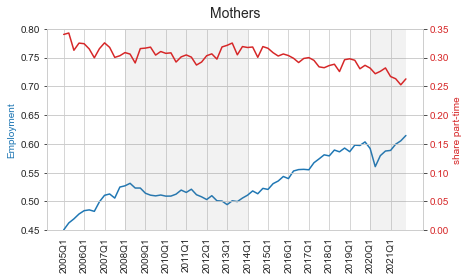

In [449]:
colors = sn.color_palette()

plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
plt.title('Mothers',y=1.025, fontsize=14)
# for c,s in zip(colors[1:],states):
#     ax1.plot(flows_p['dates'],flows_p[s0+s]/flows_p['Total'],label=s0+s,c=c)
ax1.plot(dates[t0:],emp_tab_mum['T']+emp_tab_mum['P'],label='employment')
ax1.set_ylabel('Employment', color=colors[0])
# ax1.plot(dates[t0:],1-emp_tab_dad['I'],label='fathers')
ax1.set_ylim(0.45,0.8)
# plt.xlim(0,T)
plt.xticks(dates[t0::4],rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('share part-time', color=colors[3])  # we already handled the x-label with ax1
ax2.plot(dates[t0:],pt_mum,label='share part-time',color=colors[3])
ax2.tick_params(axis='y', labelcolor=colors[3])
ax2.set_ylim(0,0.35)
# ax2.set_yticks(np.arange(0.15,0.3625,0.025))

plt.xticks(dates[t0::4],rotation=90)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
plt.savefig('./plots_tenure/partime_vs_employment.pdf',format='pdf',bbox_inches='tight')

plt.show()

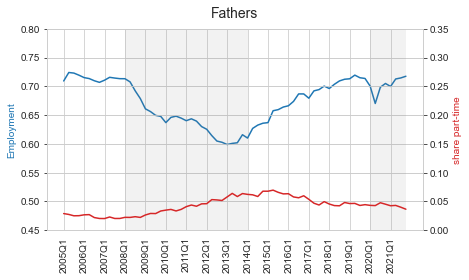

In [448]:
colors = sn.color_palette()

plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
plt.title('Fathers',y=1.025, fontsize=14)
# for c,s in zip(colors[1:],states):
#     ax1.plot(flows_p['dates'],flows_p[s0+s]/flows_p['Total'],label=s0+s,c=c)
ax1.plot(dates[t0:],emp_tab_dad['T']+emp_tab_dad['P'],label='employment')
ax1.set_ylabel('Employment', color=colors[0])
# ax1.plot(dates[t0:],1-emp_tab_dad['I'],label='fathers')
ax1.set_ylim(0.45,0.8)
# plt.xlim(0,T)
plt.xticks(dates[t0::4],rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('share part-time', color=colors[3])  # we already handled the x-label with ax1
ax2.plot(dates[t0:],pt_dad,label='share part-time',color=colors[3])
# ax2.tick_params(axis='y', labelcolor=colors[0])
ax2.set_ylim(0,0.35)
# ax2.set_yticks(np.arange(0.00,0.09,0.01))

plt.xticks(dates[t0::4],rotation=90)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

plt.tight_layout()
# plt.savefig('./plots_tenure/partime_vs_employment_f.pdf',format='pdf',bbox_inches='tight')

plt.show()

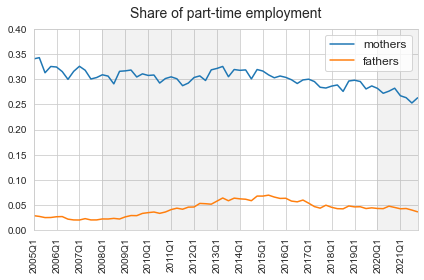

In [458]:
plt.title('Share of part-time employment',y=1.025, fontsize=14)
plt.plot(dates[t0:],pt_mum,label='mothers')
plt.plot(dates[t0:],pt_dad,label='fathers')

plt.xticks(dates[t0::4], rotation=90)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)
plt.legend(loc='upper right',fontsize=12)
plt.ylim(0,0.4)
plt.xlim('2005Q1','2021Q4')

plt.tight_layout()
plt.savefig('./plots_tenure/share_pt.pdf',format='pdf',bbox_inches='tight')
plt.show()

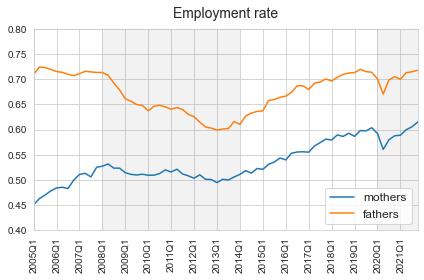

In [459]:
plt.title('Employment rate',y=1.025, fontsize=14)
plt.plot(dates[t0:],emp_tab_mum['T']+emp_tab_mum['P'],label='mothers')
plt.plot(dates[t0:],emp_tab_dad['T']+emp_tab_dad['P'],label='fathers')

plt.xticks(dates[t0::4], rotation=90)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)
plt.legend(loc='lower right',fontsize=12)
plt.ylim(0.4,0.8)
plt.xlim('2005Q1','2021Q4')

plt.tight_layout()
plt.savefig('./plots_tenure/employment.pdf',format='pdf',bbox_inches='tight')
plt.show()

<a id='age'></a>


## Age plots

Jump to
 - [Index](#index)
 - [Tenure Heatmaps](#heatwave)
 - [Employment plots](#emp)
 - [hours plots](#hours)

In [23]:
path = './rawtabs_dem/'

age_tab_mum = read_table(path+'age_mothers_w.log',keyword='ciclo',rescale=1,ncols=6)
age_tab_dad = read_table(path+'age_fathers_w.log',keyword='ciclo',rescale=1,ncols=6)


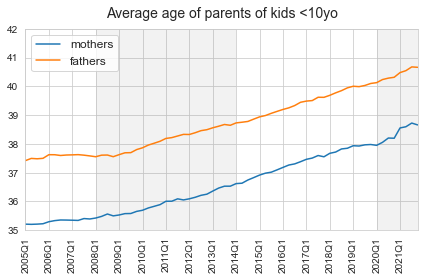

In [262]:
plt.title('Average age of parents of kids <10yo',y=1.025, fontsize=14)
plt.plot(dates[t0:],age_tab_mum['Mean'],label='mothers')
plt.plot(dates[t0:],age_tab_dad['Mean'],label='fathers')

plt.xticks(dates[t0::4], rotation=90)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)
plt.legend(loc='upper left',fontsize=12)
plt.ylim(35,42)
plt.xlim('2005Q1','2021Q4')

plt.tight_layout()
plt.savefig('./plots_tenure/age_mean_parents.pdf',format='pdf',bbox_inches='tight')
plt.show()

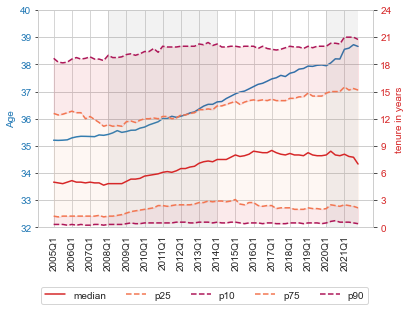

In [416]:
colors = sn.color_palette()
reds = sn.color_palette('rocket_r')

fig, ax1 = plt.subplots(figsize=(6,4))
# plt.title('Tenure vs participation, mothers of children <10yo')
# for c,s in zip(colors[1:],states):
#     ax1.plot(flows_p['dates'],flows_p[s0+s]/flows_p['Total'],label=s0+s,c=c)
ax1.plot(dates[t0:],age_tab_mum['Mean'],label='average age')
ax1.set_ylabel('Age', color=colors[0])
ax1.set_ylim(32,40)
ax1.tick_params(axis='y', labelcolor=colors[0])
plt.xticks(dates[t0::4],rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('tenure in years', color=colors[3])  # we already handled the x-label with ax1
ax2.plot(dates[t0:],ten_w_mo['p50']/12,label='median',color=colors[3])
ax2.plot(dates[t0:],ten_w_mo['p25']/12,label='p25',color=reds[1],ls='--')
ax2.plot(dates[t0:],ten_w_mo['p10']/12,label='p10',color=reds[3],ls='--')
ax2.plot(dates[t0:],ten_w_mo['p75']/12,label='p75',color=reds[1],ls='--')
ax2.plot(dates[t0:],ten_w_mo['p90']/12,label='p90',color=reds[3],ls='--')

ax2.fill_between(dates[t0:],ten_w_mo['p25']/12,ten_w_mo['p75']/12,color=reds[0],alpha=0.1)
ax2.fill_between(dates[t0:],ten_w_mo['p10']/12,ten_w_mo['p25']/12,color=reds[2],alpha=0.1)
ax2.fill_between(dates[t0:],ten_w_mo['p75']/12,ten_w_mo['p90']/12,color=reds[2],alpha=0.1)
ax2.tick_params(axis='y', labelcolor=colors[3])
ax2.set_ylim(0,24)
ax2.set_yticks(np.arange(0,27,3))
ax2.legend(ncol=5,bbox_to_anchor=(1,-0.25))


plt.xticks(dates[t0::4],rotation=90)

plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)

# plt.tight_layout()
# plt.savefig('./plots_tenure/tenure_vs_age_dist.pdf',format='pdf',bbox_inches='tight')
# 
plt.show()

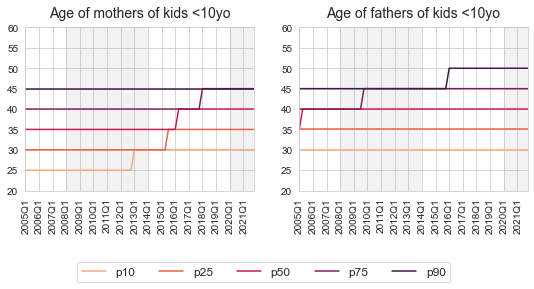

In [261]:
colors = sn.color_palette('rocket_r',5)
pcntles = ['p10','p25','p50','p75','p90']

plt.figure(figsize=(9,3))
plt.subplot(121)
plt.title('Age of mothers of kids <10yo',y=1.025, fontsize=14)

for i,pcn in enumerate(pcntles):
    plt.plot(dates[t0:],age_tab_mum[pcn],label=pcn, color=colors[i])

plt.xticks(dates[t0::4], rotation=90)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)
# plt.legend(loc='upper left',fontsize=12)
plt.ylim(20,60)
plt.xlim('2005Q1','2021Q4')

plt.subplot(122)
plt.title('Age of fathers of kids <10yo',y=1.025, fontsize=14)

for i,pcn in enumerate(pcntles):
    plt.plot(dates[t0:],age_tab_dad[pcn],label=pcn, color=colors[i])

plt.xticks(dates[t0::4], rotation=90)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)
plt.legend(loc='upper left',fontsize=12,ncol=5,bbox_to_anchor=(-1,-0.4))
plt.ylim(20,60)
plt.xlim('2005Q1','2021Q4')

# plt.tight_layout()
plt.savefig('./plots_tenure/age_percentiles_parents.pdf',format='pdf',bbox_inches='tight')
plt.show()

<a id='hours'></a>


## Hours plots

Jump to
 - [Index](#index)
 - [Tenure Heatmaps](#heatwave)
 - [Employment plots](#emp)
 - [Age plots](#age)

In [24]:
path = './rawtabs_dem/'

hours_tab_mum = read_table(path+'hours_mothers_w.log',keyword='ciclo',rescale=1,ncols=6)
hours_tab_dad = read_table(path+'hours_fathers_w.log',keyword='ciclo',rescale=1,ncols=6)
hours_tab_mum['dates'] = hours_tab_mum.index.map(date_dict)
hours_tab_dad['dates'] = hours_tab_dad.index.map(date_dict)

from f_detrend import detrend_fuction

date_cuts_t = ['2005Q1','2008Q1','2013Q1','2016Q1','2020Q1']
date_cuts_t1 = ['2007Q4','2012Q4','2015Q4','2019Q4','2021Q4']
date_cuts = np.vstack((date_cuts_t,date_cuts_t1))

hours_mums_ltrend,hours_mums_predict = detrend_fuction(hours_tab_mum,'Mean',date_cuts,
                                                 date0='2021Q4',dateT='2021Q4',date_dict=date_dict_reverse_ciclo)
hours_mums_deseason = hours_mums_ltrend + hours_tab_mum['Mean'] -hours_mums_predict

hours_dads_ltrend,hours_dads_predict = detrend_fuction(hours_tab_dad,'Mean',date_cuts,
                                                 date0='2021Q4',dateT='2021Q4',date_dict=date_dict_reverse_ciclo)
hours_dads_deseason = hours_dads_ltrend + hours_tab_dad['Mean'] -hours_dads_predict

In [26]:
hours_tab_mum_p = read_table(path+'hours_mothers_p_w.log',keyword='ciclo',rescale=1,ncols=6)
hours_tab_dad_p = read_table(path+'hours_fathers_p_w.log',keyword='ciclo',rescale=1,ncols=6)
hours_tab_mum_p['dates'] = hours_tab_mum_p.index.map(date_dict)
hours_tab_dad_p['dates'] = hours_tab_dad_p.index.map(date_dict)

hours_mum_ps_ltrend,hours_mum_ps_predict = detrend_fuction(hours_tab_mum_p,'Mean',date_cuts,
                                                 date0='2021Q4',dateT='2021Q4',date_dict=date_dict_reverse_ciclo)
hours_mum_ps_deseason = hours_mum_ps_ltrend + hours_tab_mum_p['Mean'] -hours_mum_ps_predict

hours_dad_ps_ltrend,hours_dad_ps_predict = detrend_fuction(hours_tab_dad_p,'Mean',date_cuts,
                                                 date0='2021Q4',dateT='2021Q4',date_dict=date_dict_reverse_ciclo)
hours_dad_ps_deseason = hours_dad_ps_ltrend + hours_tab_dad_p['Mean'] -hours_dad_ps_predict

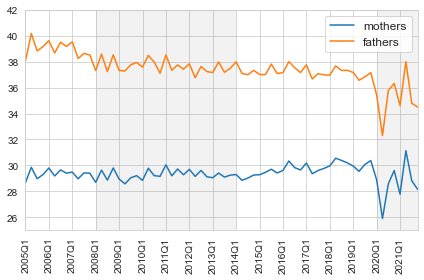

In [42]:
# plt.title('Average effective hours of work per worker \n parents of kids <10yo, deseasonalised',y=1.025, fontsize=14)
plt.plot(dates[t05:],hours_mums_deseason,label='mothers')
plt.plot(dates[t05:],hours_dads_deseason,label='fathers')

plt.xticks(dates[t0::4], rotation=90)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)
plt.legend(loc='upper right',fontsize=12)
plt.ylim(25,42)
plt.xlim('2005Q1','2021Q4')

plt.tight_layout()
plt.savefig('./plots_tenure/average_hours_parents.pdf',format='pdf',bbox_inches='tight')
plt.show()

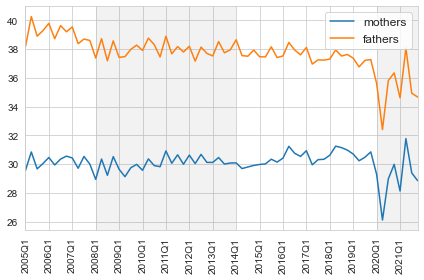

In [41]:
# plt.title('Average effective hours of work per worker \n parents of kids <10yo, deseasonalised',y=1.025, fontsize=14)
plt.plot(dates[t05:],hours_mum_ps_deseason,label='mothers')
plt.plot(dates[t05:],hours_dad_ps_deseason,label='fathers')

plt.xticks(dates[t05::4], rotation=90)
plt.axvspan('2008Q1', '2014Q1', color='grey', alpha=0.1, lw=0)
plt.axvspan('2020Q1', '2021Q4', color='grey', alpha=0.1, lw=0)
plt.legend(loc='upper right',fontsize=12)
# plt.ylim(25,42)
plt.xlim('2005Q1','2021Q4')

plt.tight_layout()
plt.savefig('./plots_tenure/average_hours_parents_p.pdf',format='pdf',bbox_inches='tight')
plt.show()

Full-time only

In [24]:
path = './rawtabs_dem/'

hours_tab_mum = read_table(path+'hours_mothers_w_ft.log',keyword='ciclo',rescale=1,ncols=6)
hours_tab_dad = read_table(path+'hours_fathers_w.log',keyword='ciclo',rescale=1,ncols=6)
hours_tab_mum['dates'] = hours_tab_mum.index.map(date_dict)
hours_tab_dad['dates'] = hours_tab_dad.index.map(date_dict)

from f_detrend import detrend_fuction

date_cuts_t = ['2005Q1','2008Q1','2013Q1','2016Q1','2020Q1']
date_cuts_t1 = ['2007Q4','2012Q4','2015Q4','2019Q4','2021Q4']
date_cuts = np.vstack((date_cuts_t,date_cuts_t1))

hours_mums_ltrend,hours_mums_predict = detrend_fuction(hours_tab_mum,'Mean',date_cuts,
                                                 date0='2021Q4',dateT='2021Q4',date_dict=date_dict_reverse_ciclo)
hours_mums_deseason = hours_mums_ltrend + hours_tab_mum['Mean'] -hours_mums_predict

hours_dads_ltrend,hours_dads_predict = detrend_fuction(hours_tab_dad,'Mean',date_cuts,
                                                 date0='2021Q4',dateT='2021Q4',date_dict=date_dict_reverse_ciclo)
hours_dads_deseason = hours_dads_ltrend + hours_tab_dad['Mean'] -hours_dads_predict

<a id='export'></a>


## Export cell

Please excecute the other sections first

Jump to
 - [Index](#index)
 - [Tenure Heatmaps](#heatwave)
 - [Employment plots](#emp)
 - [Age plots](#age)
 - [Hours plots](#hours)

In [47]:
tenure_mom = ten_w_mo['Mean'].copy()
tenure_mom.rename('Tenure_mother',inplace=True)
tenure_dad = ten_w_fa['Mean'].copy()
tenure_dad.rename('Tenure_father',inplace=True)
tenure_mom_p = ten_w_mo_p['Mean'].copy()
tenure_mom_p.rename('Tenure_mother_PC',inplace=True)
tenure_dad_p = ten_w_fa_p['Mean'].copy()
tenure_dad_p.rename('Tenure_father_PC',inplace=True)

emp_mom = emp_tab_mum['P']+emp_tab_mum['T']
emp_mom.rename('Employment_mother',inplace=True)
emp_dad = emp_tab_dad['P']+emp_tab_dad['T']
emp_dad.rename('Employment_father',inplace=True)

par_mom = 1-emp_tab_mum['I']
par_mom.rename('Participation_mother',inplace=True)
par_dad = 1-emp_tab_dad['I']
par_dad.rename('Participation_father',inplace=True)

unemp_mom = emp_tab_mum['U']/(1-emp_tab_mum['I'])
unemp_mom.rename('Unemployment_mother',inplace=True)
unemp_dad = emp_tab_dad['U']/(1-emp_tab_dad['I'])
unemp_dad.rename('Unemployment_father',inplace=True)

age_mom = age_tab_mum['Mean'].copy()
age_mom.rename('Age_mother',inplace=True)
age_dad = age_tab_dad['Mean'].copy()
age_dad.rename('Age_father',inplace=True)

hours_mums_deseason.rename('Hours_mother',inplace=True)
hours_dads_deseason.rename('Hours_father',inplace=True)

quarters = pd.Series(dict(zip(hours_mums_deseason.index,dates[date_dict_reverse['2005Q1']:])),name='dates')

df_export = pd.concat((tenure_mom,tenure_dad,tenure_mom_p,tenure_dad_p,par_mom,par_dad,emp_mom,emp_dad,unemp_mom,unemp_dad,
                       age_mom,age_dad,hours_mums_deseason,hours_dads_deseason,quarters),axis=1)
df_export.head()

,Tenure_mother,Tenure_father,Tenure_mother_PC,Tenure_father_PC,Participation_mother,Participation_father,Employment_mother,Employment_father,Unemployment_mother,Unemployment_father,Age_mother,Age_father,Hours_mother,Hours_father,dates
130,91.09012,116.9287,127.9036,141.4162,0.633599,0.961774,0.450439,0.709365,0.147943,0.044601,35.20958,37.41877,28.671940,38.063430,2005Q1
131,89.06780,115.4223,126.7102,143.1194,0.635941,0.963031,0.462568,0.724105,0.129352,0.036813,35.20274,37.49490,29.851419,40.176169,2005Q2
132,89.37599,114.5817,125.6732,140.4082,0.633274,0.960994,0.469644,0.723078,0.115090,0.038163,35.21030,37.48182,28.971241,38.834750,2005Q3
133,90.05831,114.4557,129.0288,141.2429,0.649908,0.961877,0.478113,0.719393,0.125371,0.037142,35.22358,37.49816,29.290787,39.165262,2005Q4
134,91.16219,116.4211,130.2905,146.4587,0.659418,0.962015,0.483887,0.715218,0.130488,0.039579,35.29366,37.62405,29.797640,39.625940,2006Q1


In [48]:
df_export.to_stata('parents_dataset_spain.dta')

In [107]:
total.values[0]

16072829.039702678